<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#PMB-文章-绘图汇总" data-toc-modified-id="PMB-文章-绘图汇总-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>PMB 文章 绘图汇总</a></span><ul class="toc-item"><li><span><a href="#数据剪裁" data-toc-modified-id="数据剪裁-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>数据剪裁</a></span></li><li><span><a href="#区域分割" data-toc-modified-id="区域分割-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>区域分割</a></span></li><li><span><a href="#SNR-绘制" data-toc-modified-id="SNR-绘制-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>SNR 绘制</a></span></li><li><span><a href="#绘制-模型在整个数据集上面的表现" data-toc-modified-id="绘制-模型在整个数据集上面的表现-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>绘制 模型在整个数据集上面的表现</a></span><ul class="toc-item"><li><span><a href="#数据预处理函数" data-toc-modified-id="数据预处理函数-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>数据预处理函数</a></span></li><li><span><a href="#计算loss-和-REL-函数" data-toc-modified-id="计算loss-和-REL-函数-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>计算loss 和 REL 函数</a></span></li></ul></li><li><span><a href="#不同能量和不同方向" data-toc-modified-id="不同能量和不同方向-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>不同能量和不同方向</a></span></li><li><span><a href="#不同-SNR下-模型表现" data-toc-modified-id="不同-SNR下-模型表现-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>不同 SNR下 模型表现</a></span></li><li><span><a href="#不同能量" data-toc-modified-id="不同能量-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>不同能量</a></span><ul class="toc-item"><li><span><a href="#计算整个数据集-损失-函数" data-toc-modified-id="计算整个数据集-损失-函数-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>计算整个数据集 损失 函数</a></span></li></ul></li><li><span><a href="#Compare" data-toc-modified-id="Compare-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Compare</a></span></li><li><span><a href="#Test-on-new-ct" data-toc-modified-id="Test-on-new-ct-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Test on new ct</a></span><ul class="toc-item"><li><span><a href="#不加-CT-值" data-toc-modified-id="不加-CT-值-1.9.1"><span class="toc-item-num">1.9.1&nbsp;&nbsp;</span>不加 CT 值</a></span></li><li><span><a href="#加入-CT-值" data-toc-modified-id="加入-CT-值-1.9.2"><span class="toc-item-num">1.9.2&nbsp;&nbsp;</span>加入 CT 值</a></span></li></ul></li><li><span><a href="#绘制-Hidden-State" data-toc-modified-id="绘制-Hidden-State-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>绘制 Hidden State</a></span></li><li><span><a href="#计算预测时间" data-toc-modified-id="计算预测时间-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>计算预测时间</a></span></li></ul></li></ul></div>

# PMB 文章 绘图汇总


## 数据剪裁

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

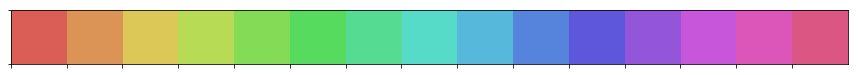

In [2]:
c=sns.color_palette("hls", 15)
sns.palplot(c)

In [3]:
font = {
    'family': 'serif',
    'style': 'italic',
    'weight': 'bold',
    'color': 'red',
    'size': 30
}

font = {'family': 'serif', 'style': 'normal', 'weight': 'bold', 'size': 50}

font2 = {'family': 'serif', 'style': 'normal', 'weight': 'bold', 'size': 30}

font3 = {
    'family': 'Times New Roman',
    'style': 'normal',
    'weight': 'bold',
    'size': 50
}

In [3]:
def data_pre(filepath):
    
    # 数据预处理函数
    
    df = pd.read_excel(filepath)  # 读取文件
    training_set = DataFrame(df)
    training_set = training_set.T

    X_train_0 = training_set.iloc[:, :302].values
    y_train_0 = training_set.iloc[:, 302:].values
    #X_train_0 = X_train_0[:, :240]
    #y_train_0 = y_train_0[:, :240]  # 修建 0 值

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X_train_0, y_train_0, test_size=0.2, random_state=1340)

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1], 1))

    N = y_test.shape[0]

    return X_train, y_train, X_test, y_test, X_train_0,y_train_0

In [4]:
X_train, y_train, X_test, y_test, X_train_0,y_train_0 = data_pre("train_3.xlsx")

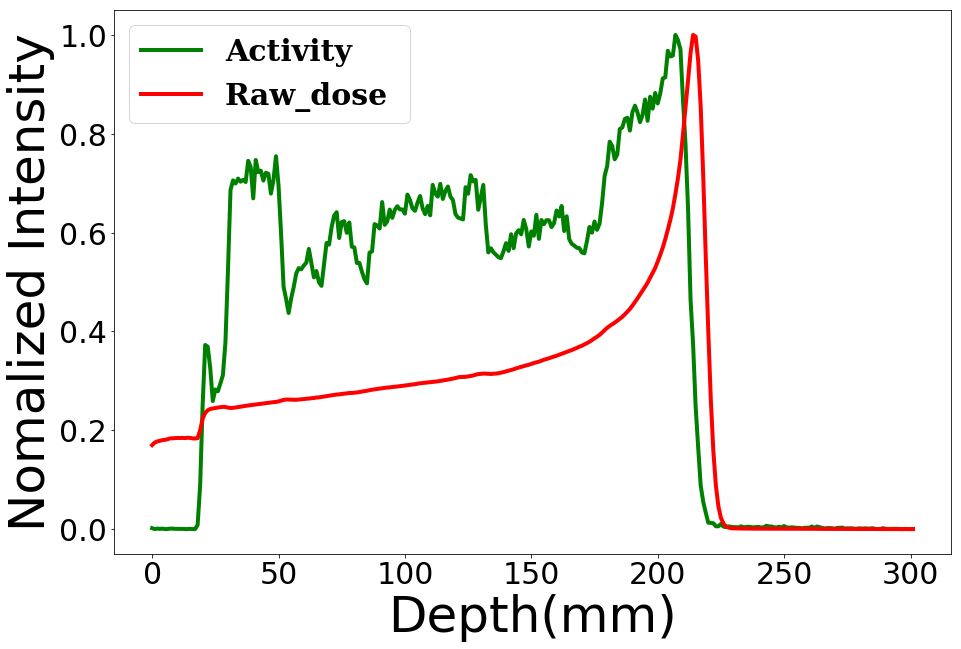

In [18]:
plt.figure(figsize=(15, 10))
X_test3 = X_train_0[99]
Y_test3 = y_train_0[99]
plt.plot(X_test3, color='green',lw=4, label='Activity')
plt.plot(Y_test3, color='red', lw=4, label='Raw_dose ')
plt.xlabel('Depth(mm)', fontsize='50')
plt.ylabel('Nomalized Intensity', fontsize='50')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#plt.text(220, 0.6, 'E = 112 MeV', fontsize='30')
plt.legend( prop= font2)
plt.savefig("Dose_1.png",bbox_inches='tight')

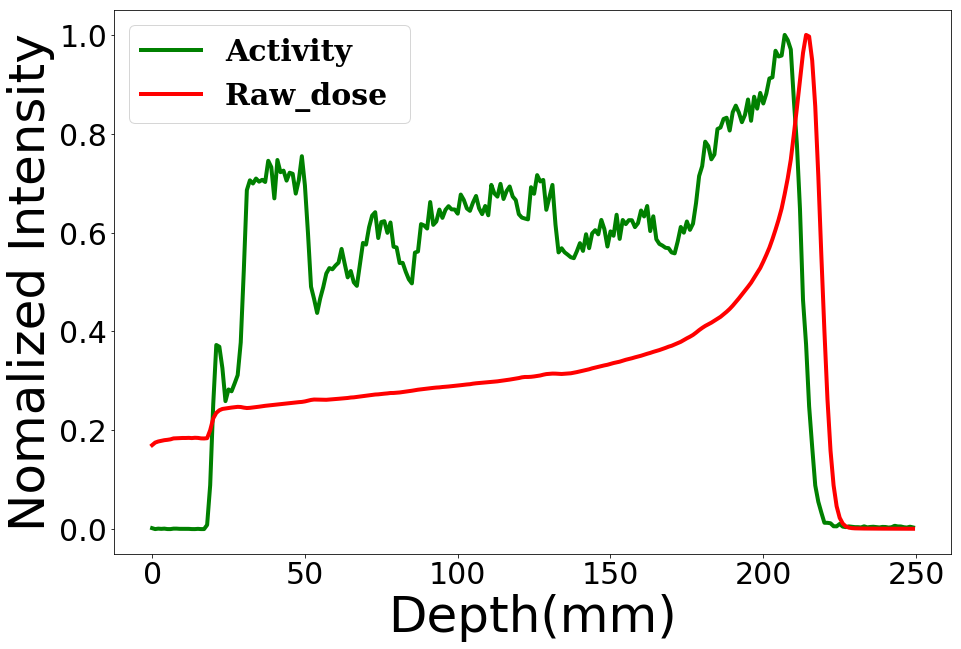

In [19]:
plt.figure(figsize=(15, 10))
X_test3 = X_train_0[99][0:250]
Y_test3 = y_train_0[99][0:250]
plt.plot(X_test3, color='green',lw=4, label='Activity')
plt.plot(Y_test3, color='red', lw=4, label='Raw_dose ')
plt.xlabel('Depth(mm)', fontsize='50')
plt.ylabel('Nomalized Intensity', fontsize='50')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#plt.text(220, 0.6, 'E = 112 MeV', fontsize='30')
plt.legend( prop= font2)
plt.savefig("Dose_2.png",bbox_inches='tight')

## 区域分割

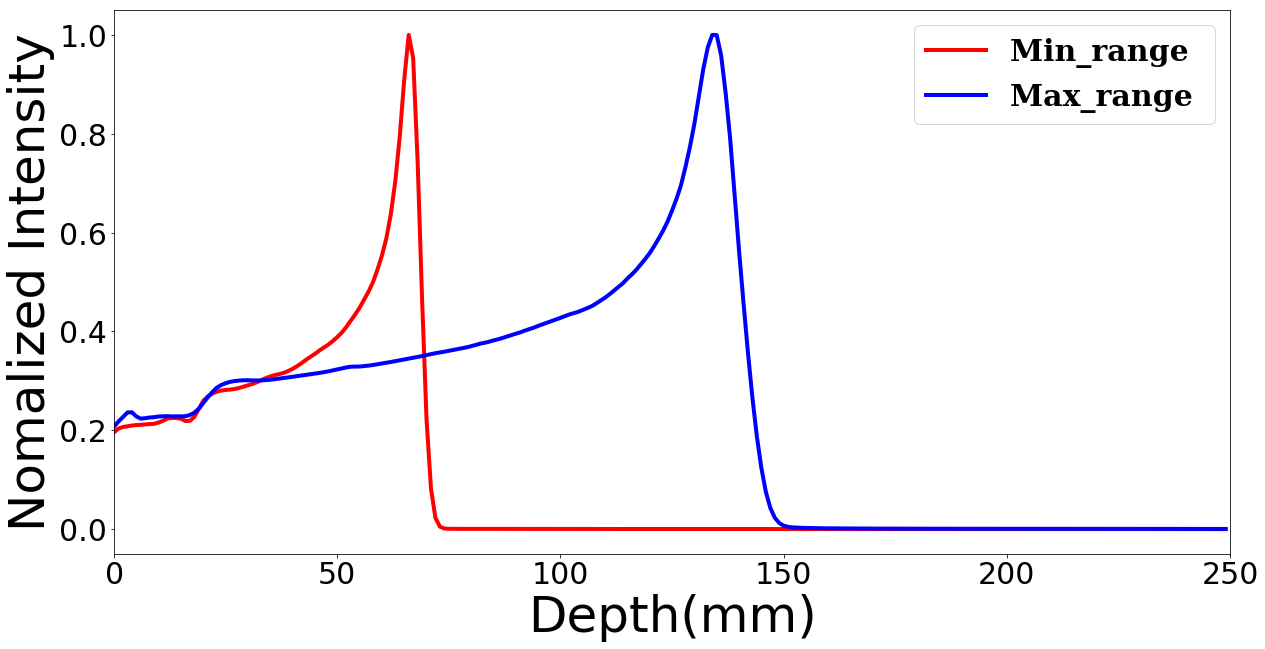

In [8]:
plt.figure(figsize=(20, 10))
Y_test0 = dose[0][:250]
plt.plot(Y_test0, color='red', lw=4, label='Min_range ')
Y_test99 = dose[1080][:250]
plt.plot(Y_test99, color='blue', lw=4, label='Max_range ')
plt.xlabel('Depth(mm)', fontsize='50')
plt.ylabel('Nomalized Intensity', fontsize='50')
plt.tick_params(labelsize=35) # 修改坐标轴的字体
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlim((0,250))
#plt.text(220, 0.6, 'E = 112 MeV', fontsize='30')
plt.legend(prop= font2)  # 修改 legend 字体
plt.savefig("Dose_minmax_CT2_2.png",bbox_inches='tight',dpi= 200)

#plt.savefig('Dose_minmax')

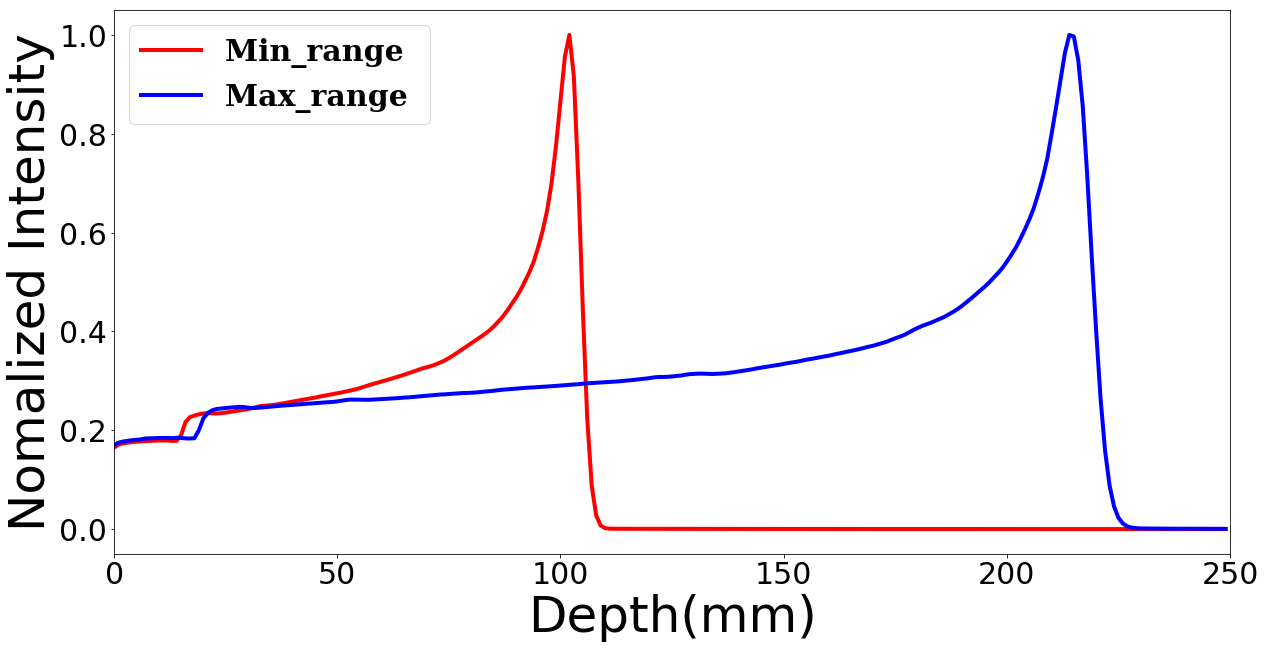

In [7]:
plt.figure(figsize=(20, 10))
Y_test0 = y_train_0[0][:250]
plt.plot(Y_test0, color='red', lw=4, label='Min_range ')
Y_test99 = y_train_0[99][:250]
plt.plot(Y_test99, color='blue', lw=4, label='Max_range ')
plt.xlabel('Depth(mm)', fontsize='50')
plt.ylabel('Nomalized Intensity', fontsize='50')
plt.tick_params(labelsize=35) # 修改坐标轴的字体
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlim((0,250))
#plt.text(220, 0.6, 'E = 112 MeV', fontsize='30')
plt.legend(prop= font2)  # 修改 legend 字体
plt.savefig("Dose_minmax_2.png",bbox_inches='tight',dpi =200)

#plt.savefig('Dose_minmax')

## SNR 绘制


In [41]:
GRU = pd.read_csv("GRU_loss.csv")
BiGRU = pd.read_csv("BiGRU_loss.csv")
LSTM = pd.read_csv("LSTM_loss.csv")
BiLSTM = pd.read_csv("BiLSTM_loss.csv")

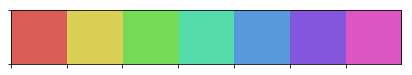

In [46]:
x = np.arange(1, 10, 1)
c=sns.color_palette("hls", 7)
sns.palplot(c)

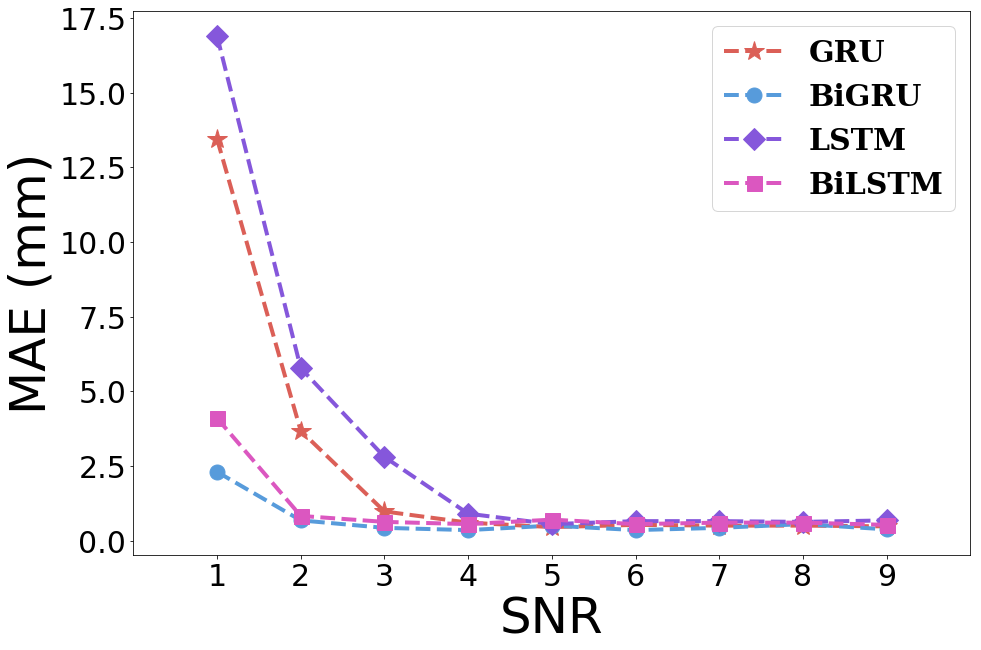

In [60]:
plt.figure(figsize=(20,10))
plt.plot(x,GRU["peak_shift_MAE_list"],'--', lw=4,marker='*',ms=20,label='GRU',color=c[0])
plt.plot(x,BiGRU["peak_shift_MAE_list"],'--',lw=4,marker='o',ms=15,label='BiGRU',color=c[4])
plt.plot(x,LSTM["peak_shift_MAE_list"],'--',lw=4,marker='D',ms=15,label='LSTM',color=c[5])
plt.plot(x,BiLSTM["peak_shift_MAE_list"],'--',lw=4,marker='s',ms=15,label='BiLSTM',color=c[6])
plt.xticks(x)
plt.xlim((0, 10))
#plt.yticks(y)
plt.ylabel("MAE (mm)",fontsize = '50')
plt.xlabel("SNR",fontsize = '50')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(prop= font2)
#plt.title('Total Loss',fontsize=40)
plt.savefig("SNR_MAE.png",bbox_inches='tight')

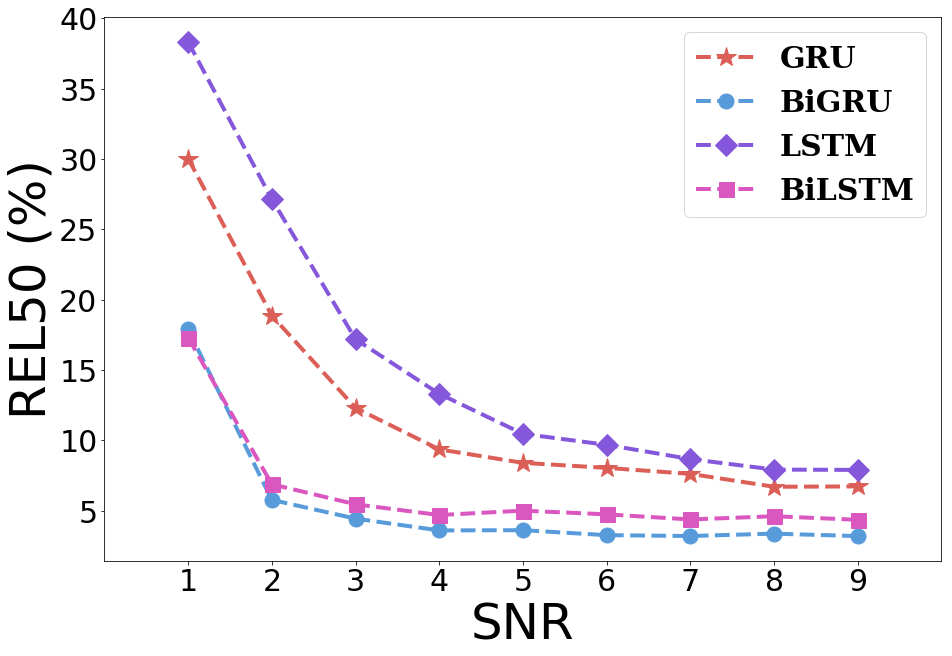

In [58]:
plt.figure(figsize=(15,10))
plt.plot(x,GRU["per50_list"]*100,'--', lw=4,marker='*',ms=20,label='GRU',color=c[0])
plt.plot(x,BiGRU["per50_list"]*100,'--',lw=4,marker='o',ms=15,label='BiGRU',color=c[4])
plt.plot(x,LSTM["per50_list"]*100,'--',lw=4,marker='D',ms=15,label='LSTM',color=c[5])
plt.plot(x,BiLSTM["per50_list"]*100,'--',lw=4,marker='s',ms=15,label='BiLSTM',color=c[6])
plt.xticks(x)
plt.xlim((0, 10))
#plt.yticks(y)
plt.ylabel("REL50 (%)",fontsize = '50')
plt.xlabel("SNR",fontsize = '50')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(prop= font2)
#plt.title('Total Loss',fontsize=40)
plt.savefig("SNR_REL50.png",bbox_inches='tight')

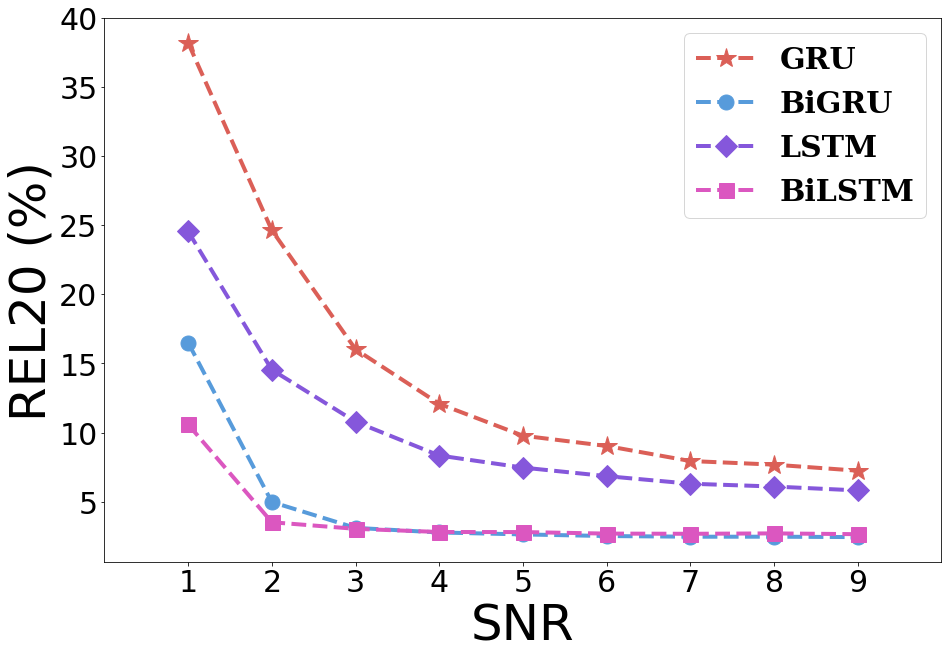

In [59]:
plt.figure(figsize=(15,10))
plt.plot(x,GRU["per20_list"]*100,'--', lw=4,marker='*',ms=20,label='GRU',color=c[0])
plt.plot(x,BiGRU["per20_list"]*100,'--',lw=4,marker='o',ms=15,label='BiGRU',color=c[4])
plt.plot(x,LSTM["per20_list"]*100,'--',lw=4,marker='D',ms=15,label='LSTM',color=c[5])
plt.plot(x,BiLSTM["per20_list"]*100,'--',lw=4,marker='s',ms=15,label='BiLSTM',color=c[6])
plt.xticks(x)
plt.xlim((0, 10))
#plt.yticks(y)
plt.ylabel("REL20 (%)",fontsize = '50')
plt.xlabel("SNR",fontsize = '50')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(prop= font2)
#plt.title('Total Loss',fontsize=40)
plt.savefig("SNR_REL20.png",bbox_inches='tight')

## 绘制 模型在整个数据集上面的表现

In [6]:
import keras
import tensorflow as tf
from keras import backend as K
from keras.layers import LSTM, TimeDistributed, BatchNormalization, Bidirectional, Dense, Dropout
from keras.models import Sequential, Model, load_model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.layers.recurrent import GRU
from keras.layers import *
from keras.utils.vis_utils import plot_model

UNITS = 32  # Units 数目
EPOCHS = 2  # 训练循环数目
TEST_SIZE = 0.2  # 数据集分割比例
VAL = 0.2  # val 分割比例
BATCH_SIZE = 32  # 一次训练多少组
seed = 1340  # 随机数种子
PATIENCE = 20  # 允许不降落步数
OUTPUT_SIZE = 1  # 输入一个 输出 1个
LR = 0.006            # 误差期望
filepath1 = 'train_3.xlsx'
filepath2 = "Dose_inter_slinear.xlsx"

model = Sequential()
model.add(
    Bidirectional(
        GRU(
            input_shape=(250, 2),
            units=UNITS,
            return_sequences=True,
            name="GRU_1"),
        name="BiGRU_1"))

#model.add(Dropout(0.10, name="dropout_2"))

model.add(
    Bidirectional(
        GRU(
            input_shape=(250, 2),
            units=UNITS,
            return_sequences=True,
            name="GRU_2"),
        name="BiGRU_2"))
model.add(
    Bidirectional(
        GRU(
            input_shape=(250, 2),
            units=UNITS,
            return_sequences=True,
            name="GRU_3"),
        name="BiGRU_3"))
model.add(TimeDistributed(Dense(OUTPUT_SIZE, name="Dense"), name="TDense"))
adam = Adam(LR)

model.compile(
    optimizer=adam,
    loss='mse',
)

Using TensorFlow backend.


### 数据预处理函数

In [4]:
def data_pre(filepath1, filepath2):
    df = pd.read_excel(filepath1)  # 读取文件
    training_set = DataFrame(df)
    training_set = training_set.T

    ct = pd.read_excel(filepath2, header=None)
    ct = np.array(ct)
    ct = ct[:, :250]

    X_train_0 = training_set.iloc[:, :302].values
    y_train_0 = training_set.iloc[:, 302:].values
    X_train_0 = X_train_0[:, :250]
    y_train_0 = y_train_0[:, :250]  # 修建 0 值

    X_train_total = np.zeros((200, 250, 2))
    for i in range(200):
        X_train_total[i, :, 0] = X_train_0[i, :]
    for i in range(200):
        X_train_total[i, :, 1] = ct[i % 10, :]

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X_train_total, y_train_0, test_size=TEST_SIZE, random_state=seed)

    #X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
    #X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1], 1))

    return X_train, y_train, X_test, y_test, X_train_total, y_train_0

In [3]:
def data_pre_2(filepath):
    
    # 不加 CT值
    
    df = pd.read_excel(filepath)  # 读取文件
    training_set = DataFrame(df)
    training_set = training_set.T

    X_train_0 = training_set.iloc[:, :302].values
    y_train_0 = training_set.iloc[:, 302:].values
    X_train_0 = X_train_0[:, :250]
    y_train_0 = y_train_0[:, :250]  # 修建 0 值

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X_train_0, y_train_0, test_size=TEST_SIZE, random_state=seed)

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1], 1))

    N = y_test.shape[0]

    return X_train, y_train, X_test, y_test, X_train_0,y_train_0

In [28]:
X_train, y_train, X_test, y_test, X_train_0, y_train_0 = data_pre(filepath1,filepath2)
history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=2,
    verbose=1,
    validation_split=0.2,  # 加入 交叉验证集
    )

Train on 128 samples, validate on 32 samples
Epoch 1/2
128/128 [==============================] - 5s 35ms/step - loss: 1.1940 - val_loss: 0.6412
Epoch 2/2
128/128 [==============================] - 2s 14ms/step - loss: 0.3209 - val_loss: 0.3319


In [29]:
model.load_weights('BiGRU_DLoss.h5',by_name= True)

### 计算loss 和 REL 函数

In [330]:
def loss_cal(X_test, y_test):

    # 计算 LOSS 峰值偏移等指标

    N = X_test.shape[0]

    test_loss_total = []
    peak_loss_total = []
    peak_shift_total = []
    peak_half_loss_list = []
    peak_twenty_percent_loss_list = []

    for i in range(N):

        X_test[i] = np.array(X_test[i], dtype=float)
        y_test[i] = np.array(y_test[i], dtype=float)
        X_test_0 = X_test[i][np.newaxis, :, :]
        y_test_0 = y_test[i][np.newaxis, :, :]

        # 计算 测试集总误差

        y_test_0_pred = model.predict(X_test_0)
        test_loss = np.mean(np.square(y_test_0_pred - y_test_0))
        test_loss_total.append(test_loss)

        x_pre = model.predict(X_test_0)
        x_pre = x_pre.ravel()  # 调整形状
        x_pre = np.array(x_pre, dtype=np.float64)  # 调整 数据
        x_real = y_test_0.ravel()

        # 计算测试集 peak 偏移
        peak_shift = abs(np.argmax(x_real) - np.argmax(x_pre))
        peak_shift_total.append(peak_shift)

        # 转换为列表
        x_real_list = x_real.tolist()
        x_pre_list = x_pre.tolist()

        # 计算 测试集 距离峰值一半的偏差
        half_peak = x_real.max() * 0.5
        for j in x_real[:np.argmax(x_real)]:
            if j > half_peak or j == half_peak:
                index_l1 = x_real_list.index(j)
                break
        for j in x_real[np.argmax(x_real):]:
            if j < half_peak or j == half_peak:
                index_r1 = x_real_list[np.argmax(x_real):].index(
                    j) + np.argmax(x_real)
                break

        half_loss = [
            abs(x_real_list[i] - x_pre_list[i])
            for i in range(index_l1,index_r1)
        ]
        peak_half_loss = np.mean(np.square(half_loss))
        peak_half_loss_list.append(peak_half_loss)

        # 计算距离峰值 20% 的偏差
        twenty_percent_peak = x_real.max() * 0.2
        for i in x_real[:np.argmax(x_real)]:
            if i > twenty_percent_peak or i == twenty_percent_peak:
                index_l2 = x_real_list.index(i)
                break

        for i in x_real[np.argmax(x_real):]:
            if i < twenty_percent_peak or i == twenty_percent_peak:
                index_r2 = x_real_list[np.argmax(x_real):].index(
                    i) + np.argmax(x_real)
                break
        twenty_percent_loss = [
            abs(x_real_list[i] - x_pre_list[i])
            for i in range(index_l2,index_r2)
        ]
        peak_twenty_percent_loss = np.mean(np.square(twenty_percent_loss))
        peak_twenty_percent_loss_list.append(peak_twenty_percent_loss)

        i = i + 1

    peak_shift_MAE = np.mean(peak_shift_total)
    peak_shift_MSE = np.mean(np.square(peak_shift_total))
    peak_twenty_percent_loss_ave = np.mean(peak_twenty_percent_loss_list)
    peak_half_loss_ave = np.mean(peak_half_loss_list)
    test_loss_total_ave = np.mean(test_loss_total)

    return peak_shift_MAE,peak_shift_MSE,test_loss_total_ave,peak_half_loss_ave,peak_twenty_percent_loss_ave

In [411]:
def curve_shift(X_test, y_test):

    per_average_total = []
    per50_average_total = []
    per20_average_total = []
    N = X_test.shape[0]

    for i in range(N):

        X_test[i] = np.array(X_test[i], dtype=float)
        y_test[i] = np.array(y_test[i], dtype=float)
        X_test_0 = X_test[i][np.newaxis, :, :]
        y_test_0 = y_test[i][np.newaxis, :, :]
        #X_test[i] = X_test[i].reshape(X_test[i].shape(1),X_test[i].shape(0),1)
        #y_test[i] = y_test[i].reshape(y_test[i].shape(1),y_test[i].shape(0),1)

        

        x_pre = model.predict(X_test_0, batch_size=1, verbose=0)
        x_pre = x_pre.ravel()  # 调整形状
        x_pre = np.array(x_pre, dtype=np.float64)  # 调整 数据
        x_real = y_test_0.ravel()

        # 计算曲线的 总偏移
        #curve_shift = x_real - x_pre
        per_list = []
        n = 0
        for i in range(240):
            if x_real[i] >  1e-3:
                n= n+1
                a= abs(x_real[i] - x_pre[i] )/ x_real[i] 
                per_list.append(a)
        per_average = sum(per_list) / n
        per_average_total.append(per_average)

        # 计算曲线的半高偏移

        # 转换为列表
        x_real_list = x_real.tolist()
        x_pre_list = x_pre.tolist()

        # 计算 测试集 距离峰值一半的偏差
        half_peak = x_real.max() * 0.5
        for j in x_real[:np.argmax(x_real)]:
            if j > half_peak or j == half_peak:
                index_l1 = x_real_list.index(j)
                break
        for j in x_real[np.argmax(x_real):]:
            if j < half_peak or j == half_peak:
                index_r1 = x_real_list[np.argmax(x_real):].index(
                    j) + np.argmax(x_real)
                break

        per50_list = [
            abs(x_real_list[i] - x_pre_list[i]) / x_real_list[i]
            for i in range(index_l1,index_r1)
        ]

        per50_average = sum(per50_list) / (index_r1 - index_l1)
        per50_average_total.append(per50_average)

        # 计算距离峰值 20% 的偏差
        twenty_percent_peak = x_real.max() * 0.2
        for i in x_real[:np.argmax(x_real)]:
            if i > twenty_percent_peak or i == twenty_percent_peak:
                index_l2 = x_real_list.index(i)
                break

        for i in x_real[np.argmax(x_real):]:
            if i < twenty_percent_peak or i == twenty_percent_peak:
                index_r2 = x_real_list[np.argmax(x_real):].index(
                    i) + np.argmax(x_real)
                break
        per20_list = [
            abs(x_real_list[i] - x_pre_list[i]) / x_real_list[i]
            for i in range(index_l2,index_r2)
        ]

        per20_average = sum(per20_list) / (index_r2 - index_l2)
        per20_average_total.append(per20_average)

        i = i + 1

    per100 = sum(per_average_total) / N
    per50 = sum(per50_average_total) / N
    per20 = sum(per20_average_total) / N

    return per100, per50, per20

In [77]:
peak_shift_total = loss_cal(X_train_0, y_train_0[:,:,np.newaxis])
per100,per50,per20  = curve_shift(X_train_0, y_train_0[:,:,np.newaxis])

In [108]:
per50_list = [i*100 for i in per50 ]
per20_list = [i*100 for i in per20]


In [124]:
def to_percent(y, position):
    return str( y /200 *100 ) + '%'

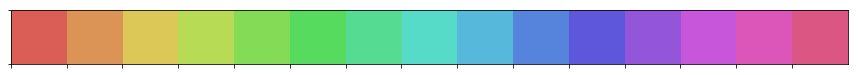

In [120]:
c=sns.color_palette("hls", 15)
sns.palplot(c)

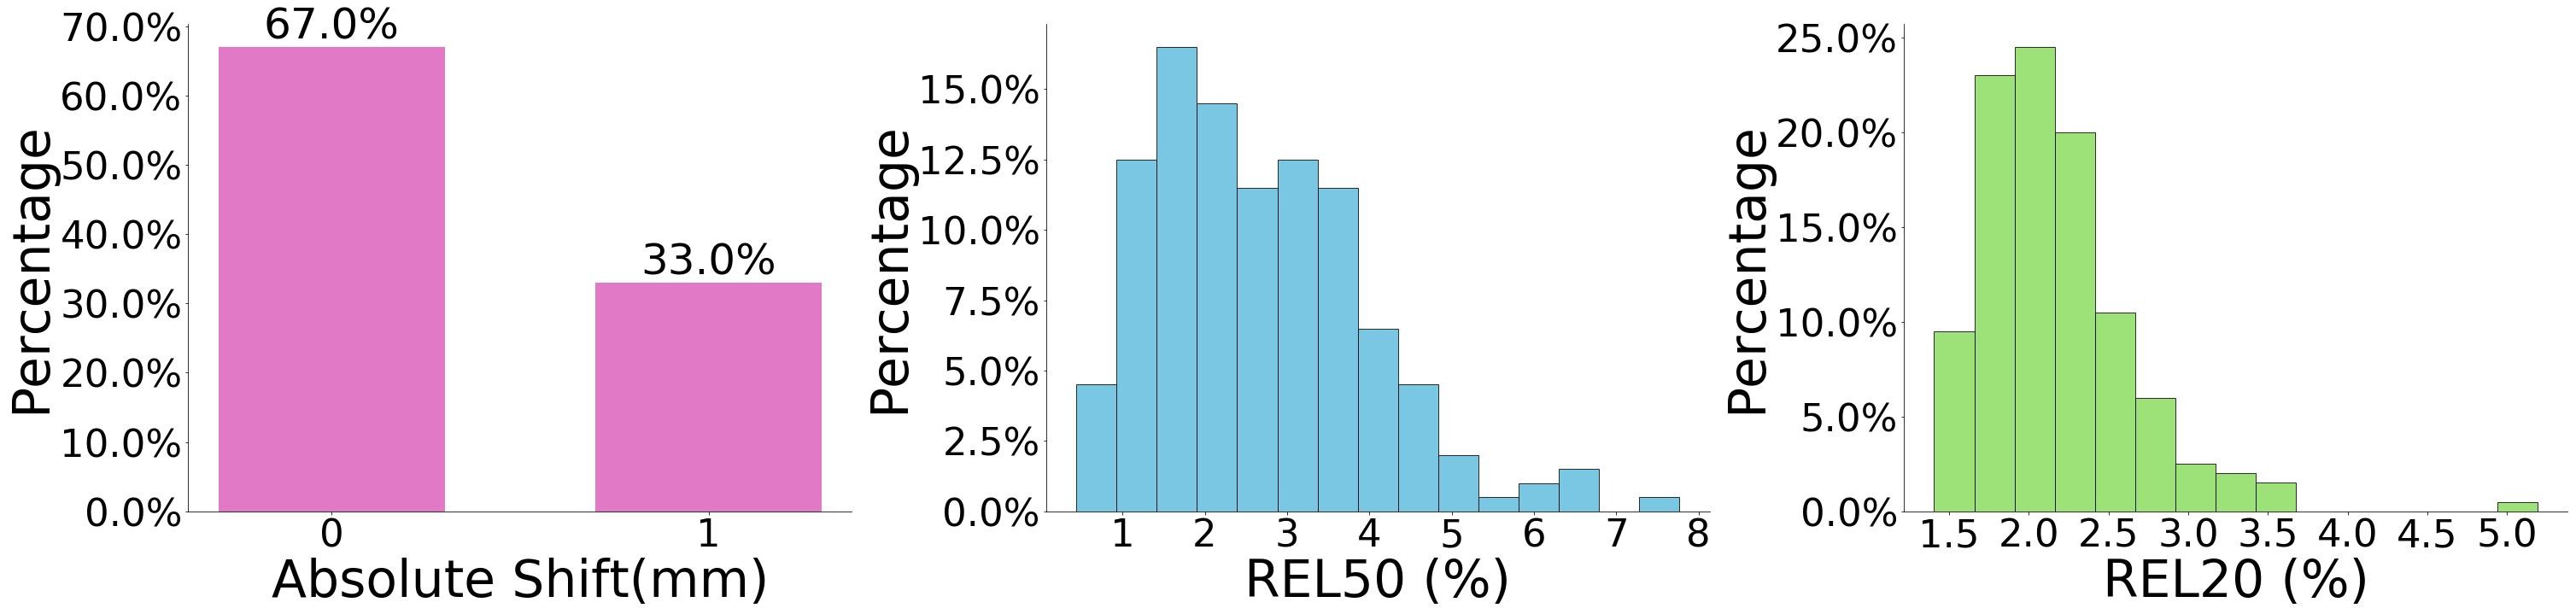

In [141]:
plt.figure(figsize=(42, 10))

# 峰值偏移 直方图
plt.subplot(131)
count0, count1, count2 = 0, 0, 0
for i in peak_shift_total:
    if i == 0:
        count0 += 1
    elif i == 1:
        count1 += 1
    else:
        count2 += 1
data = [count0, count1]

left_1 = range(len(data))
rects1 = plt.bar(x=left_1, height=data, width=0.6, alpha=0.8, color=c[13])
plt.ylabel("Percentage", fontsize='60')
plt.xlabel("Absolute Shift(mm)", fontsize='60')
plt.xticks([index for index in left_1], left_1)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
for a, b in zip(left_1, data):
    plt.text(
        a,
        b + 0.05,
        '%.1f' % (b / 200 * 100) + '%',
        ha='center',
        va='bottom',
        fontsize=50)  #  加入数字诸事


def to_percent(y, position):
    return str(y / 200 * 100) + '%'


formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)

frame = plt.gca()
# y 轴不可见
#frame.axes.get_yaxis().set_visible(False)
# x 轴不可见
#frame.axes.get_xaxis().set_visible(False)

frame.axes.spines['top'].set_visible(False)
frame.axes.spines['right'].set_visible(False)

plt.subplot(132)
plt.hist(
    per50_list,
    bins=15,
    density=0,
    facecolor=c[8],
    edgecolor="black",
    alpha=0.8)
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel("REL50 (%)", fontsize='60')
# 显示纵轴标签
plt.ylabel("Percentage", fontsize='60')
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
frame = plt.gca()
# y 轴不可见
#frame.axes.get_yaxis().set_visible(False)
# x 轴不可见
#frame.axes.get_xaxis().set_visible(False)

frame.axes.spines['top'].set_visible(False)
frame.axes.spines['right'].set_visible(False)

# 50% 损失值 分布
from matplotlib.ticker import FuncFormatter
# 把y轴转化为百分比。

# 直方图的数据集

# 设置直方图分组数量bins=60.

plt.subplot(133)
plt.hist(
    per20_list,
    bins=15,
    density=0,
    facecolor=c[4],
    edgecolor="black",
    alpha=0.8)
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel("REL20 (%)", fontsize='60')
# 显示纵轴标签
plt.ylabel("Percentage", fontsize='60')
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
frame = plt.gca()
# y 轴不可见
#frame.axes.get_yaxis().set_visible(False)
# x 轴不可见
#frame.axes.get_xaxis().set_visible(False)

frame.axes.spines['top'].set_visible(False)
frame.axes.spines['right'].set_visible(False)
#plt.title("50% Loss Range", fontsize='30')
plt.tight_layout()
plt.savefig("Total_data.png", bbox_inches='tight')

In [30]:
font3 = {
    'family': 'Times New Roman',
    'style': 'normal',
    'weight': 'bold',
    'size': 60
}
font = {
    'family': 'Times New Roman',
    'style': 'normal',
    'weight': 'bold',
    'size': 40
}

## 不同能量和不同方向

* 不同能量 【14，114，54】
* 不同方向【52，50，58】


In [7]:
X_train, y_train, X_test, y_test, X_train_0, y_train_0 = data_pre(filepath1,filepath2)

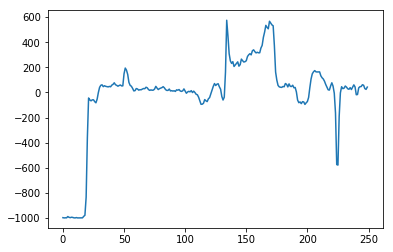

In [8]:
X_test3 = X_train_0[58]
plt.plot(X_test3[:,1])

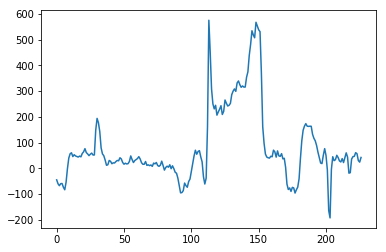

In [18]:
Hu =list( X_test3[:,1])
HU= filter(lambda x : x >-200, Hu)
plt.plot(list(HU))

In [26]:
Hu =list( X_test3[:,1])
for i in range(len(Hu)):
    if Hu[i] < -200 :
        Hu[i] = np.NAN
        

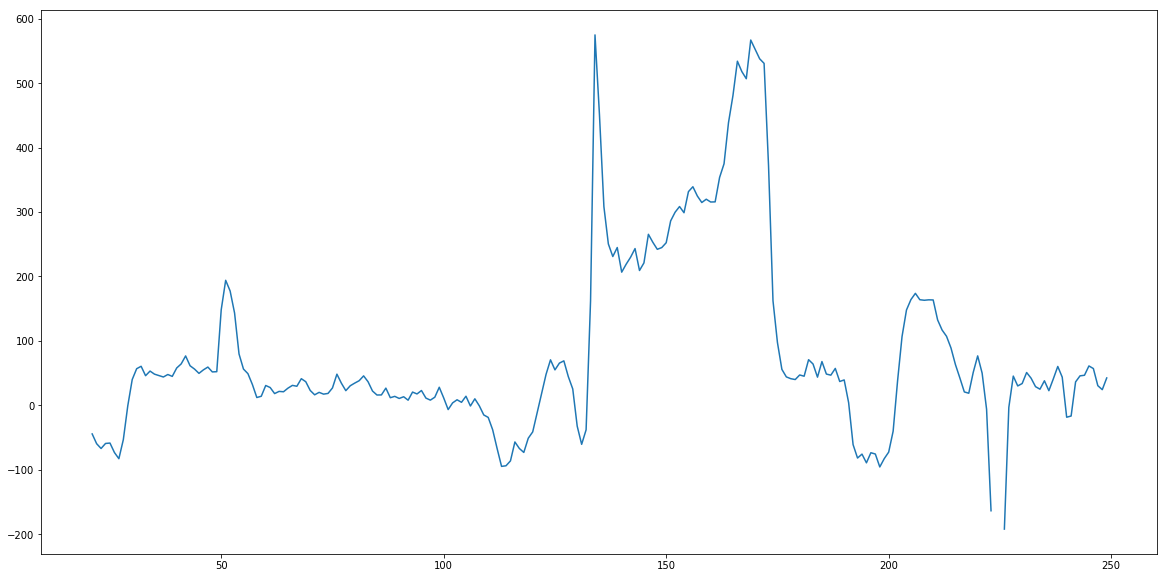

In [27]:
plt.figure(figsize=(20,10))
plt.plot(Hu)

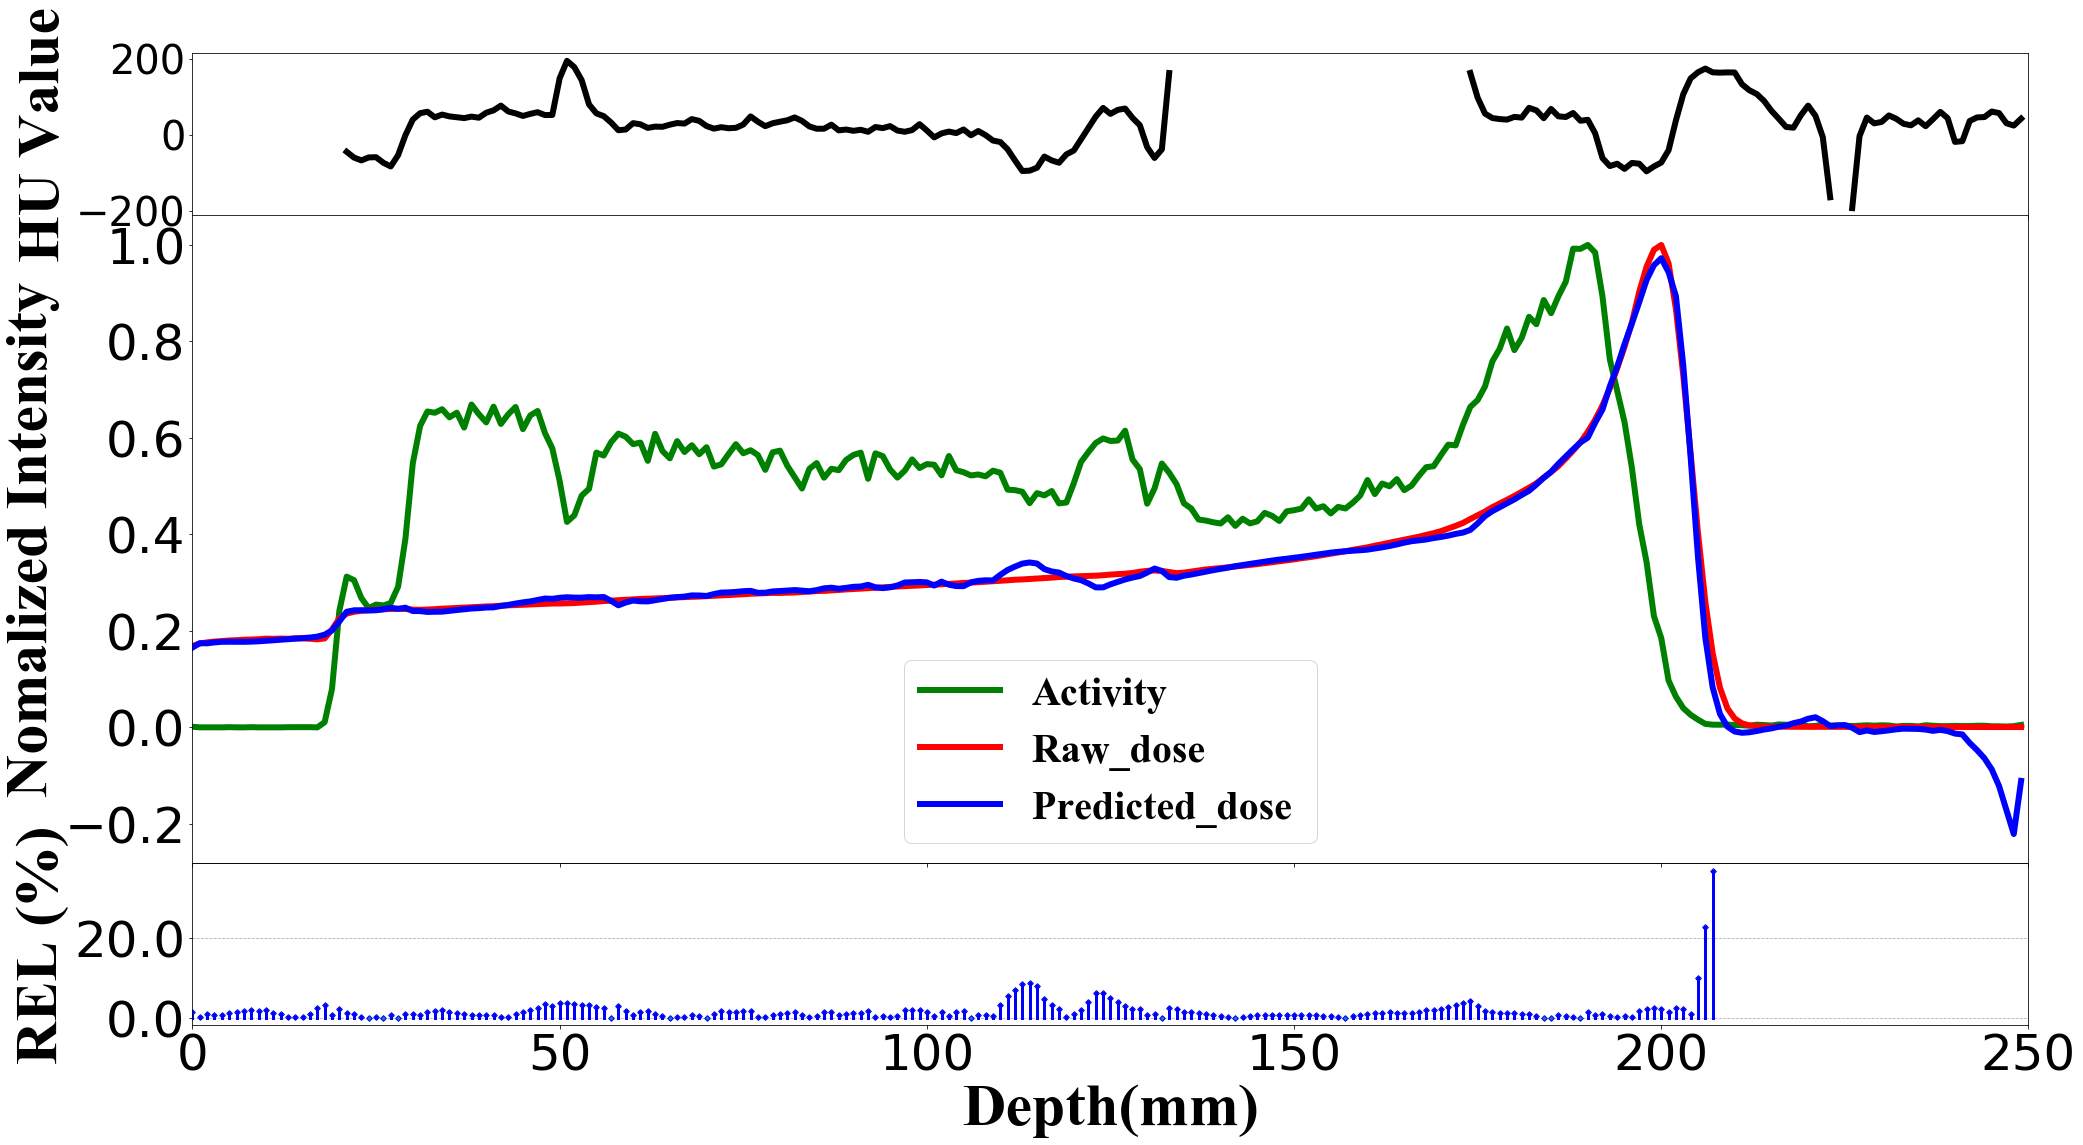

In [34]:
k = 58

rect_d = [0.1, 0.1, 0.85, 0.15]
rect_m = [0.1, 0.25, 0.85, 0.6]
rect_u = [0.1, 0.85, 0.85, 0.15]

# start with a rectangular Figure
plt.figure(1, figsize=(30, 15))

ax_u = plt.axes(rect_u)
X_test3 = X_train_0[k]
Hu =list(X_test3[:,1])
for i in range(len(Hu)):
    if Hu[i] < -200 or Hu[i] > 200:
        Hu[i] = np.NAN
ax_u.plot(Hu, color='black', lw=6)
ax_u.set_xlim((0, 250))
plt.yticks(fontsize=40)
ax_u.set_ylabel('HU Value', font3)
plt.locator_params('y', nbins=4)
#ax_u.set_yticklabels([0.0,-1000,500])
plt.setp(ax_u.get_xticklabels(), visible=False)

####  底部图

ax_d = plt.axes(rect_d)
X_test3 = X_train_0[k]
Y_test3 = y_train_0[k]
X_test3 = np.array(X_test3)
X_test3 = np.reshape(X_test3, (1, X_test3.shape[0], 2))
predicted_test3 = model.predict(X_test3)
predicted_test3 = predicted_test3.ravel()
X_test3 = X_test3[:, 0].ravel()
per_list = []
for i in range(250):
    if Y_test3[i] > 0.1:
        a = abs(predicted_test3[i] - Y_test3[i]) / Y_test3[i]
        per_list.append(a)
per_array = np.array(per_list) * 100
x = range(len(per_list))
markerline, stemlines, baseline = ax_d.stem(x, per_array, '--')
plt.setp(
    markerline,
    marker='D',
    markersize=4,
    markeredgecolor="blue",
    markeredgewidth=1)
plt.setp(stemlines, linestyle="-", color="blue", linewidth=3)
plt.setp(baseline, visible=False)
plt.grid(True, axis='y', linestyle='--')
ax_d.set_xlim((0, 250))
#ax_d.set_ylim((0,10))
ax_d.set_ylabel("REL (%)", font3)
ax_d.set_xlabel('Depth(mm)', font3)
ax_d.set_yticklabels([0.0, 0.0, 20.0])
#ax_d.set_yticks([0,5,10])
plt.locator_params('y', nbins=2)
plt.xticks(fontsize="50")
plt.yticks(fontsize="50")

##### 中间绘图

ax_m = plt.axes(rect_m)

X_test3 = X_train_0[k]
Y_test3 = y_train_0[k]
X_test3 = np.array(X_test3)
X_test3 = np.reshape(X_test3, (1, X_test3.shape[0], 2))
predicted_test3 = model.predict(X_test3)
predicted_test3 = predicted_test3.ravel()
X_test3 = X_test3[:, :, 0].ravel()
ax_m.plot(X_test3, color='green', lw=6, label='Activity')
ax_m.plot(Y_test3, color='red', lw=6, label='Raw_dose ')
ax_m.plot(predicted_test3, color='blue', lw=6, label='Predicted_dose ')
#plt.title('prediction')
ax_m.set_ylabel('Nomalized Intensity', font3)
ax_m.set_xlim((0, 250))
plt.yticks(fontsize=50)
#plt.text(210, 0.5, 'E = 140 MeV', fontdict= font)
plt.legend(prop=font)

plt.setp(ax_m.get_xticklabels(), visible=False)
plt.savefig("Test2_angle_3.png", bbox_inches='tight', dpi=300)
plt.show()

## 不同 SNR下 模型表现

In [510]:
font_legend={'family':'serif',
     'style':'normal',
    'weight':'bold',
      'size':30
}

In [15]:
def activity_add_noise(X_train_0,Inputsize, Inputlength, SNR):
    x_train_noise = X_train_0*(np.ones((Inputsize, Inputlength)) + np.random.randn(Inputsize, Inputlength)/SNR)
    return x_train_noise

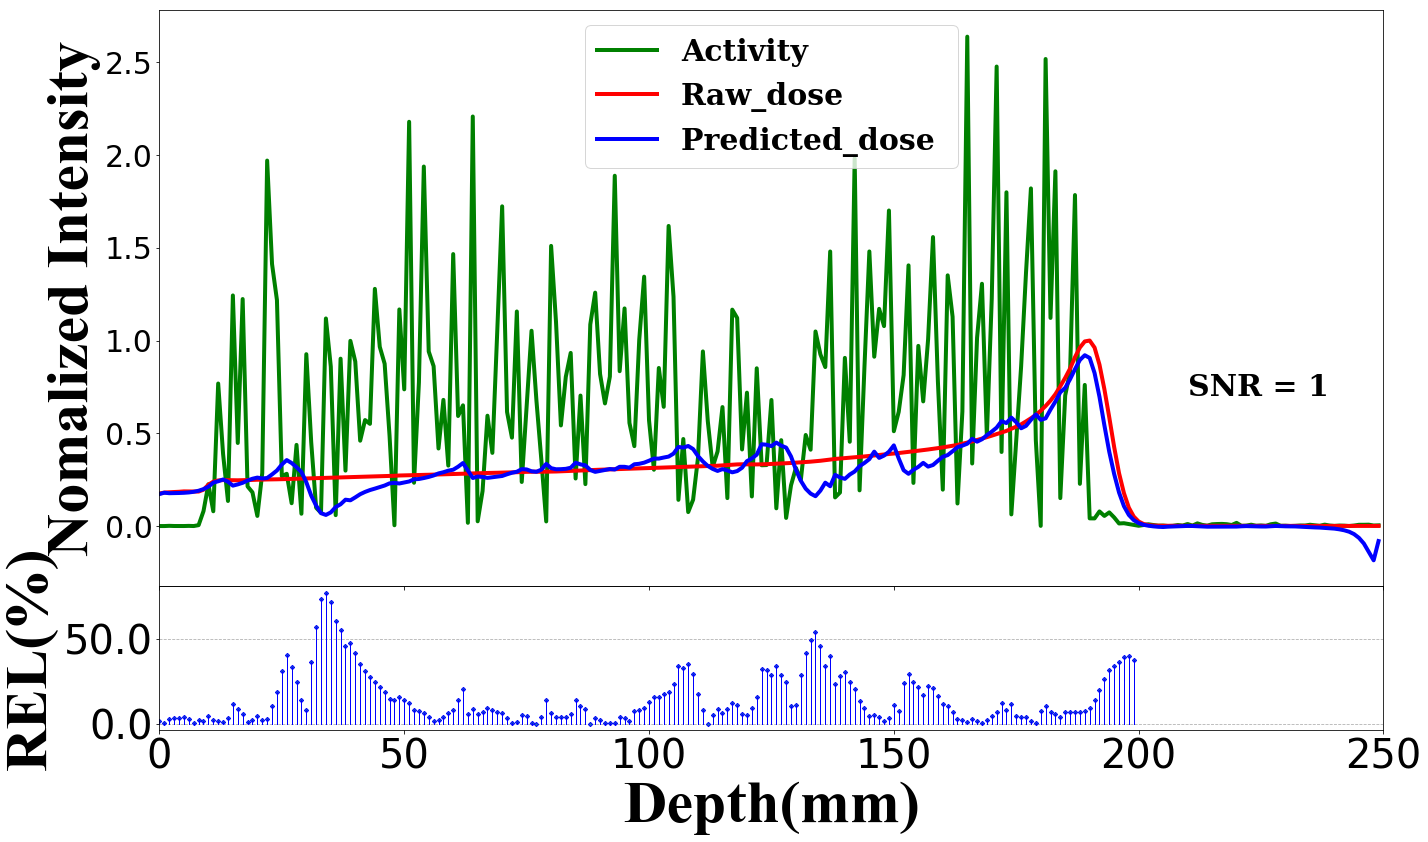

In [514]:
k = 54

# definitions for the axes
left, width = 0.1, 0.85
bottom, height = 0.8, 0.1
bottom_h = left_h = left + width

# rect_scatter = [left, bottom, width, height]
# rect_histx = [left, bottom_h, width, 0.8]
#rect_histy = [left_h, bottom, 0.2, height]

rect_d = [0.1,0.1,0.85,0.2]
rect_u = [0.1,0.3,0.85,0.8]
# start with a rectangular Figure
plt.figure(1, figsize=(20, 10))

ax_d = plt.axes(rect_d)

np.random.seed(1339)
X_train_0_SNR = activity_add_noise(
        X_train_0[:,:,0].reshape(X_train_0.shape[0], X_train_0.shape[1]),
        X_train_0.shape[0], X_train_0.shape[1], 1)


X_train_total = np.zeros((200,250,2))
for i in range(200):
    X_train_total[i,:,0] = X_train_0_SNR[i,:]
for i in range(200):
    X_train_total[i,:,1] = X_train_0[:,:,1][i,:]

SNR1 = X_train_total[k]
SNR2 = np.zeros_like(SNR1)
SNR2[:,1] = SNR1[:,1]
for i in range(250):
    if SNR1[i,0] < 0 :
        SNR2[i,0] = - SNR1[i,0] 
    else:
        SNR2[i,0] = SNR1[i,0]
Y_test3 = y_train_0[k]
X_test3 = np.array(SNR1)
X_test3 = np.reshape(X_test3, (1, X_test3.shape[0], 2))
predicted_test3 = model.predict(X_test3)
predicted_test3 = predicted_test3.ravel()
X_test3 = X_test3[:,:,0].ravel()
per_list = []
for i in range(240):
    if Y_test3[i] > 5e-2:
        a = abs( predicted_test3[i] - Y_test3[i] ) / Y_test3[i]
        per_list.append(a)
    #shift = [abs(Y_test3[i] - predicted_test3[i] )/ Y_test3[i] for i in range(240)]
    #plt.plot(X_test3)
    #plt.plot(predicted_test3)
per_array = np.array(per_list)*100
x  = range(len(per_list))
markerline, stemlines, baseline = ax_d.stem(x, per_array, '--')
plt.setp(markerline, marker='D', markersize=3, markeredgecolor="blue", markeredgewidth=1)
plt.setp(stemlines, linestyle="-", color="blue", linewidth=1 )
plt.setp(baseline, visible=False)
plt.grid(True,axis='y',linestyle='--')
ax_d.set_xlim((0,250))
#ax_d.set_ylim((0,10))
ax_d.set_ylabel("REL(%)",font3)
ax_d.set_xlabel('Depth(mm)', font3)
ax_d.set_yticklabels([0.0,0.0,50.000])
#ax_d.set_yticks([0,5,10])
plt.locator_params('y',nbins=2)
plt.xticks(fontsize = "40")
plt.yticks(fontsize="40")


##############
###############
ax_u = plt.axes(rect_u)


SNR1 = X_train_total[k]
SNR2 = np.zeros_like(SNR1)
SNR2[:,1] = SNR1[:,1]
for i in range(250):
    if SNR1[i,0] < 0 :
        SNR2[i,0] = - SNR1[i,0]
    else:
        SNR2[i,0] =  SNR1[i,0]
Y_test3 = y_train_0[k]
X_test3 = np.array(SNR1)
X_test3 = np.reshape(X_test3, (1, X_test3.shape[0], 2))

# 模型预测结果
predicted_test3 = model.predict(X_test3)
#predicted_test2 = predicted_test2.reshape((1,predicted_test2.shape[1]))
#predicted_test2 = sc.inverse_transform(predicted_test2)
predicted_test3 = predicted_test3.ravel()
X_test3 = X_test3[:,:,0].ravel()
ax_u.plot(SNR2[:,0], color='green',lw=4, label='Activity')
ax_u.plot(Y_test3, color='red', lw=4, label='Raw_dose ')
ax_u.plot(predicted_test3, color='blue', lw=4, label='Predicted_dose ')
#plt.title('prediction')
ax_u.set_ylabel('Nomalized Intensity', font3)
ax_u.set_xlim((0,250))
#ax_u.set_ylim((0,1.5))
plt.yticks(fontsize=30)
plt.text(210, 0.7, 'SNR = 1', fontdict= font_legend)
plt.legend(prop =font_legend)

plt.setp(ax_u.get_xticklabels(), visible=False)
plt.savefig("SNR1.png",bbox_inches='tight',dpi = 300)
plt.show()

In [16]:
np.random.seed(1339)
X_train_0_SNR = activity_add_noise(
        X_train_0[:,:,0].reshape(X_train_0.shape[0], X_train_0.shape[1]),
        X_train_0.shape[0], X_train_0.shape[1], 1)


X_train_total = np.zeros((200,250,2))
for i in range(200):
    X_train_total[i,:,0] = X_train_0_SNR[i,:]
for i in range(200):
    X_train_total[i,:,1] = X_train_0[:,:,1][i,:]

In [19]:
 SNR1 =X_train_total[54,:,0]

In [501]:
for i in range(250):
    if SNR1[i] < 0 :
        SNR1[i] = - SNR1[i]    

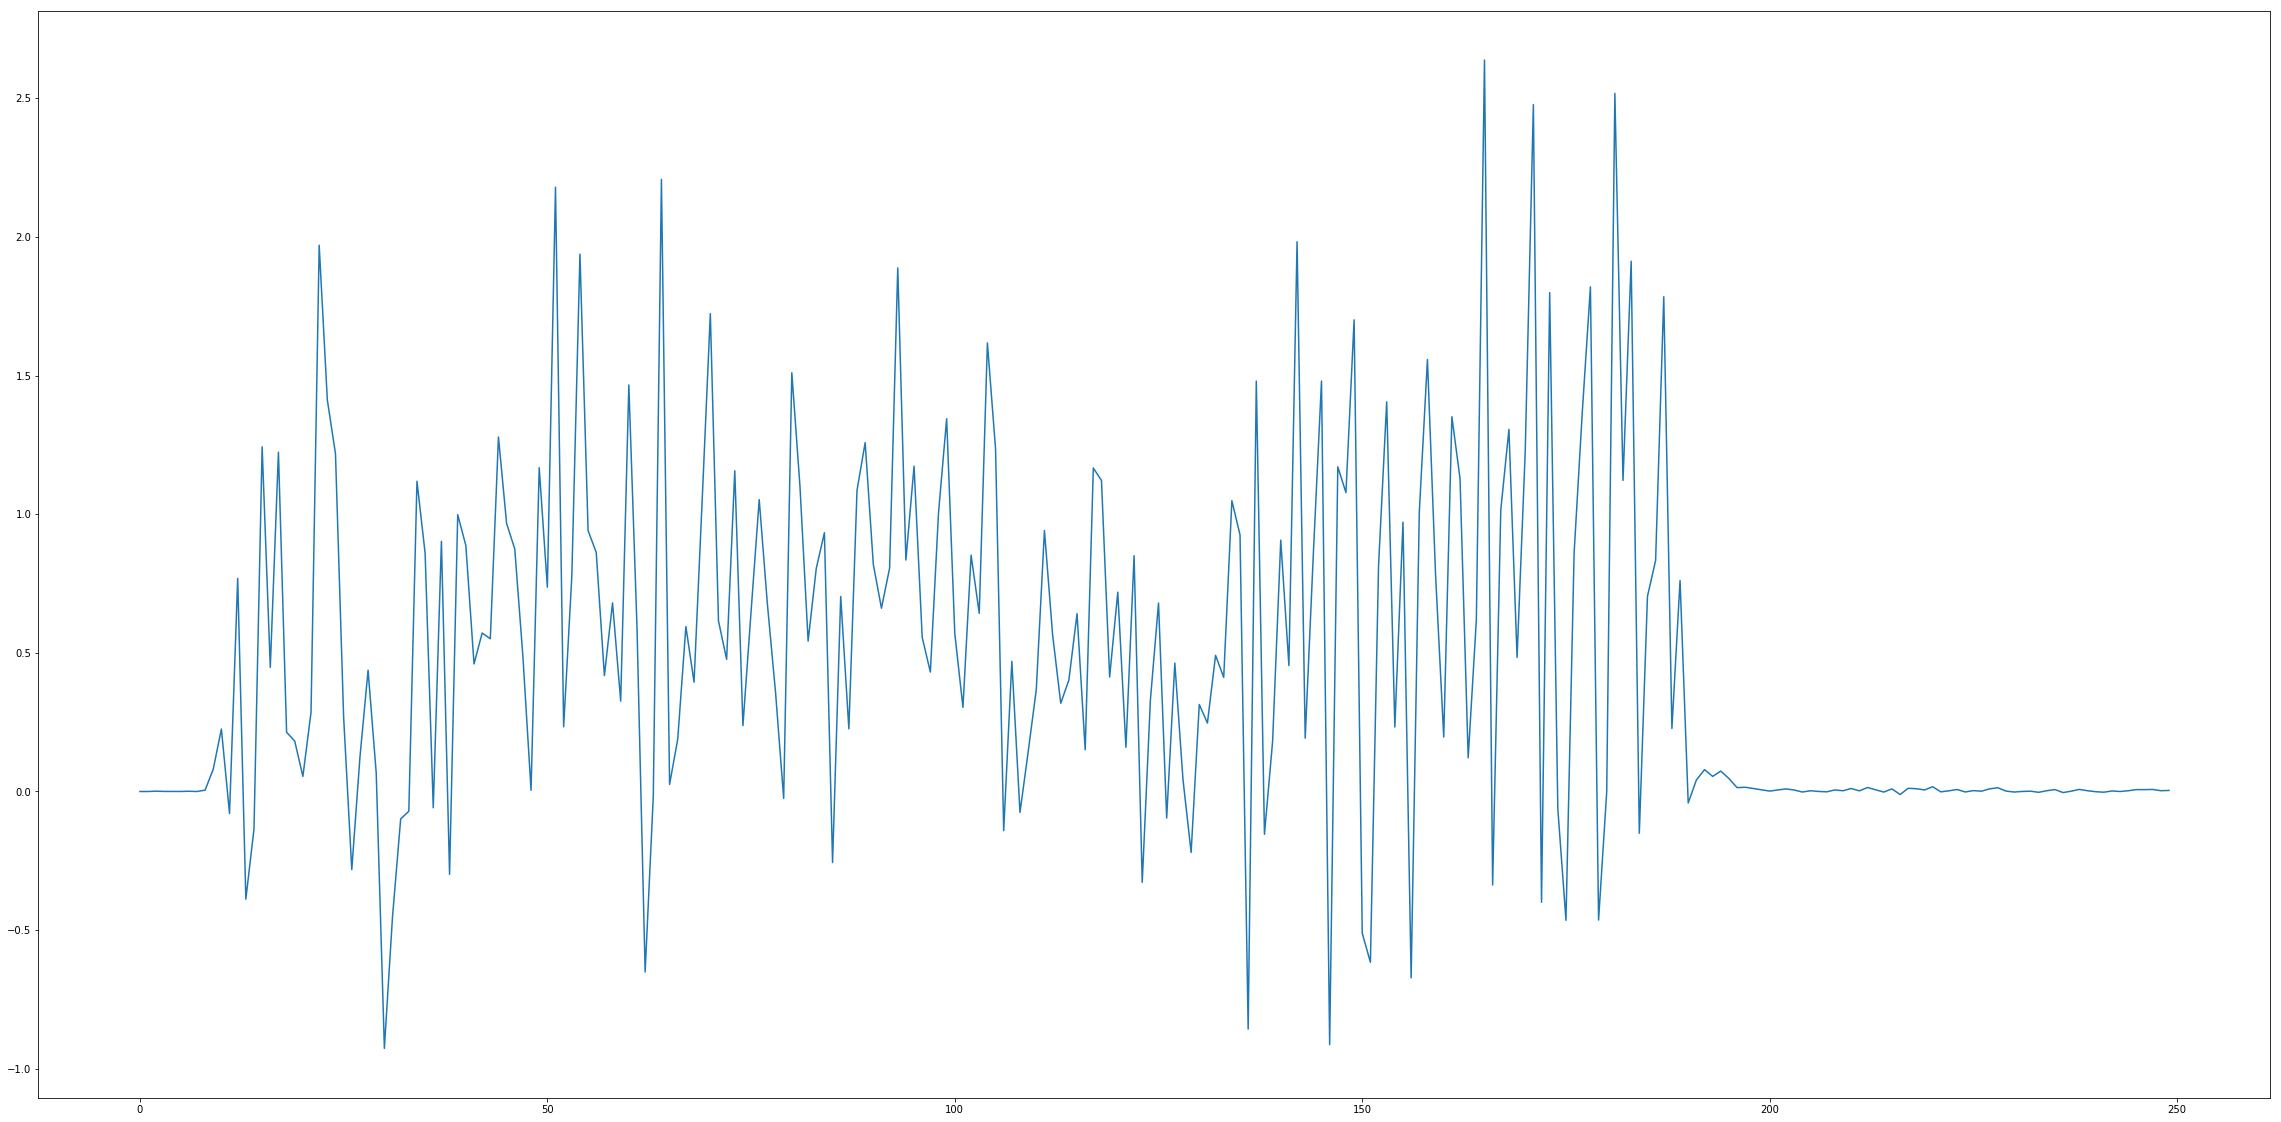

In [21]:
plt.figure(figsize=(40,20))
plt.plot(SNR1)

## 不同能量

### 计算整个数据集 损失 函数

In [279]:
def loss_cal_total(X_test, y_test):

    # 计算 LOSS 峰值偏移等指标

    N = X_test.shape[0]

    test_loss_total = []
    peak_loss_total = []
    peak_shift_total = []
    peak_half_loss_list = []
    peak_twenty_percent_loss_list = []

    for i in range(N):

        X_test[i] = np.array(X_test[i], dtype=float)
        y_test[i] = np.array(y_test[i], dtype=float)
        X_test_0 = X_test[i][np.newaxis, :, :]
        y_test_0 = y_test[i][np.newaxis, :, :]

        # 计算 测试集总误差

        y_test_0_pred = model.predict(X_test_0)
        test_loss = np.mean(np.square(y_test_0_pred - y_test_0))
        test_loss_total.append(test_loss)

        x_pre = model.predict(X_test_0)
        x_pre = x_pre.ravel()  # 调整形状
        x_pre = np.array(x_pre, dtype=np.float64)  # 调整 数据
        x_real = y_test_0.ravel()

        # 计算测试集 peak 偏移
        peak_shift = abs(np.argmax(x_real) - np.argmax(x_pre))
        peak_shift_total.append(peak_shift)

        # 转换为列表
        x_real_list = x_real.tolist()
        x_pre_list = x_pre.tolist()

        # 计算 测试集 距离峰值一半的偏差
        half_peak = x_real.max() * 0.5
        for j in x_real[:np.argmax(x_real)]:
            if j > half_peak or j == half_peak:
                index_l1 = x_real_list.index(j)
                break
        for j in x_real[np.argmax(x_real):]:
            if j < half_peak or j == half_peak:
                index_r1 = x_real_list[np.argmax(x_real):].index(
                    j) + np.argmax(x_real)
                break

        half_loss = [
            abs(x_real_list[i] - x_pre_list[i])
            for i in range(index_l1,index_r1)
        ]
        peak_half_loss = np.mean(np.square(half_loss))
        peak_half_loss_list.append(peak_half_loss)

        # 计算距离峰值 20% 的偏差
        twenty_percent_peak = x_real.max() * 0.2
        for i in x_real[:np.argmax(x_real)]:
            if i > twenty_percent_peak or i == twenty_percent_peak:
                index_l2 = x_real_list.index(i)
                break

        for i in x_real[np.argmax(x_real):]:
            if i < twenty_percent_peak or i == twenty_percent_peak:
                index_r2 = x_real_list[np.argmax(x_real):].index(
                    i) + np.argmax(x_real)
                break
        twenty_percent_loss = [
            abs(x_real_list[i] - x_pre_list[i])
            for i in range(index_l2,index_r2)
        ]
        peak_twenty_percent_loss = np.mean(np.square(twenty_percent_loss))
        peak_twenty_percent_loss_list.append(peak_twenty_percent_loss)

        i = i + 1

    peak_shift_MAE = np.mean(peak_shift_total)
    peak_shift_MSE = np.mean(np.square(peak_shift_total))
    peak_twenty_percent_loss_ave = np.mean(peak_twenty_percent_loss_list)
    peak_half_loss_ave = np.mean(peak_half_loss_list)
    test_loss_total_ave = np.mean(test_loss_total)

    return peak_shift_total

In [281]:
X_train, y_train, X_test, y_test, X_train_0, y_train_0 = data_pre(filepath1,filepath2)
X_train2, y_train2, X_test2, y_test2, X_train_02,y_train_02 = data_pre_2('train_3.xlsx')
peak_shift_total= loss_cal_total(X_train_0,y_train_0[:,:,np.newaxis])


peak_shift_ave_low = sum(peak_shift_total[0:50]) / 50
peak_shift_ave_high = sum(peak_shift_total[50:100]) / 50
peak_shift_ave_mid = sum(peak_shift_total[100:200]) / 100 # 最好 100 组 [100:200] 
print(peak_shift_ave_low)
print(peak_shift_ave_mid)
print(peak_shift_ave_high)

# peak_hloss_ave_low = sum(peak_half_loss_list[0:50]) / 50
# peak_hloss_ave_high = sum(peak_half_loss_list[50:100]) / 50
# peak_hloss_ave_mid = sum(peak_half_loss_list[100:200]) / 100

# peak_tloss_ave_low = sum(peak_twenty_percent_loss_list[0:50]) / 50
# peak_tloss_ave_high = sum(peak_twenty_percent_loss_list[50:100]) / 50
# peak_tloss_ave_mid = sum(peak_twenty_percent_loss_list[100:200]) / 100

0.32
0.34
0.32


In [285]:
def curve_shift_total(X_test, y_test):

    per_average_total = []
    per50_average_total = []
    per20_average_total = []
    N = X_test.shape[0]

    for i in range(N):

        X_test[i] = np.array(X_test[i], dtype=float)
        y_test[i] = np.array(y_test[i], dtype=float)
        X_test_0 = X_test[i][np.newaxis, :, :]
        y_test_0 = y_test[i][np.newaxis, :, :]
        #X_test[i] = X_test[i].reshape(X_test[i].shape(1),X_test[i].shape(0),1)
        #y_test[i] = y_test[i].reshape(y_test[i].shape(1),y_test[i].shape(0),1)

        

        x_pre = model.predict(X_test_0, batch_size=1, verbose=0)
        x_pre = x_pre.ravel()  # 调整形状
        x_pre = np.array(x_pre, dtype=np.float64)  # 调整 数据
        x_real = y_test_0.ravel()

        # 计算曲线的 总偏移
        #curve_shift = x_real - x_pre
        per_list = []
        n = 0
        for i in range(240):
            if x_real[i] >  1e-3:
                n= n+1
                a= abs(x_real[i] - x_pre[i] )/ x_real[i] 
                per_list.append(a)
        per_average = sum(per_list) / n
        per_average_total.append(per_average)

        # 计算曲线的半高偏移

        # 转换为列表
        x_real_list = x_real.tolist()
        x_pre_list = x_pre.tolist()

        # 计算 测试集 距离峰值一半的偏差
        half_peak = x_real.max() * 0.5
        for j in x_real[:np.argmax(x_real)]:
            if j > half_peak or j == half_peak:
                index_l1 = x_real_list.index(j)
                break
        for j in x_real[np.argmax(x_real):]:
            if j < half_peak or j == half_peak:
                index_r1 = x_real_list[np.argmax(x_real):].index(
                    j) + np.argmax(x_real)
                break

        per50_list = [
            abs(x_real_list[i] - x_pre_list[i]) / x_real_list[i]
            for i in range(index_l1,index_r1)
        ]

        per50_average = sum(per50_list) / (index_r1 - index_l1)
        per50_average_total.append(per50_average)

        # 计算距离峰值 20% 的偏差
        twenty_percent_peak = x_real.max() * 0.2
        for i in x_real[:np.argmax(x_real)]:
            if i > twenty_percent_peak or i == twenty_percent_peak:
                index_l2 = x_real_list.index(i)
                break

        for i in x_real[np.argmax(x_real):]:
            if i < twenty_percent_peak or i == twenty_percent_peak:
                index_r2 = x_real_list[np.argmax(x_real):].index(
                    i) + np.argmax(x_real)
                break
        per20_list = [
            abs(x_real_list[i] - x_pre_list[i]) / x_real_list[i]
            for i in range(index_l2,index_r2)
        ]

        per20_average = sum(per20_list) / (index_r2 - index_l2)
        per20_average_total.append(per20_average)

        i = i + 1

    per100 = sum(per_average_total) / N
    per50 = sum(per50_average_total) / N
    per20 = sum(per20_average_total) / N

    return per_average_total, per50_average_total, per20_average_total

In [289]:
per_average_total, per50_average_total, per20_average_total = curve_shift_total(
    X_train_0, y_train_0[:, :, np.newaxis])

In [290]:
per50_low = sum(per50_average_total[0:50]) / 50
per50_high = sum(per50_average_total[50:100]) / 50
per50_mid = sum(per50_average_total[100:200]) / 100

per20_low = sum(per20_average_total[0:50]) / 50
per20_high = sum(per20_average_total[50:100]) / 50
per20_mid = sum(per20_average_total[100:200]) / 100

In [291]:
print(per50_low,per50_mid,per50_high)

0.028260622121450377 0.028331609643890143 0.022350790609685024


In [292]:
print(per20_low,per20_mid,per20_high)

0.025271652663025435 0.020745029202826615 0.01976344446562783


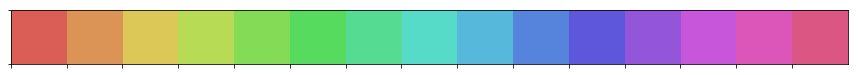

In [294]:
c=sns.color_palette("hls", 15)
sns.palplot(c)

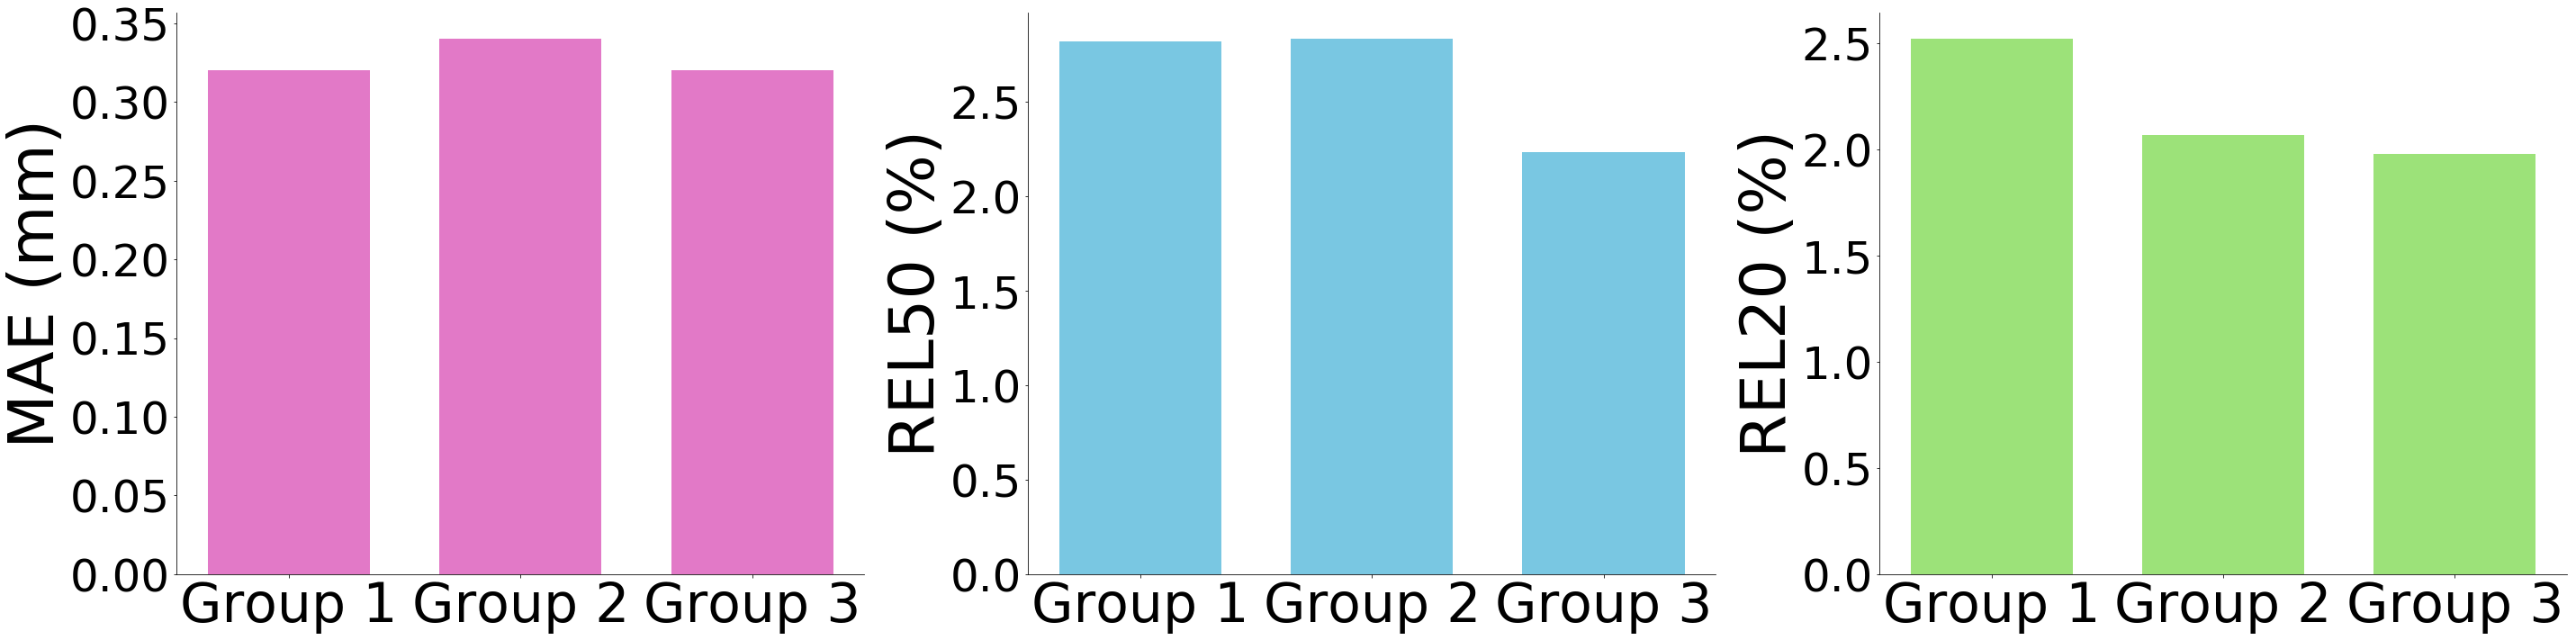

In [296]:
plt.figure(figsize=(40, 10))
plt.subplot(131)

error_config = {'ecolor': '0.2'}

means_peak_shift = (0.32,  0.34, 0.32)
#std_peak_shift = (0.05,  0.09,0.07,)
left_1 = ['Group 1', 'Group 2', 'Group 3']
rects1 = plt.bar(
    x=left_1,
    height=means_peak_shift,
    width=0.7,
    alpha=0.8,
    color=c[13],
    #yerr=std_peak_shift,
    #error_kw=error_config)
)
plt.ylabel(" MAE (mm)", fontsize='70')
#plt.xlabel("Energy", fontsize='40')
plt.xticks([index for index in left_1], left_1)
plt.xticks(fontsize=60)
plt.yticks(fontsize=50)
frame = plt.gca()
# y 轴不可见
#frame.axes.get_yaxis().set_visible(False)
# x 轴不可见
#frame.axes.get_xaxis().set_visible(False)

frame.axes.spines['top'].set_visible(False)
frame.axes.spines['right'].set_visible(False)

plt.subplot(132)
total_loss = (2.82,  2.833, 2.235)
#std_total_loss = (0.44, 0.21, 0.31)
rects1 = plt.bar(
    x=left_1,
    height=total_loss,
    width=0.7,
    alpha=0.8,
    color=c[8],
    #yerr=std_total_loss,
    #error_kw=error_config
)
plt.ylabel("REL50 (%)", fontsize='70')
#plt.xlabel("Energy", fontsize='30')
plt.xticks([index for index in left_1], left_1)
plt.xticks(fontsize=60)
plt.yticks(fontsize=50)
frame = plt.gca()
# y 轴不可见
#frame.axes.get_yaxis().set_visible(False)
# x 轴不可见
#frame.axes.get_xaxis().set_visible(False)

frame.axes.spines['top'].set_visible(False)
frame.axes.spines['right'].set_visible(False)


plt.subplot(133)
half_loss_data = (2.52, 2.07, 1.98)
std_half_loss_data = (0.775, 0.715, 0.707)
rects1 = plt.bar(
    x=left_1,
    height=half_loss_data,
    width=0.7,
    alpha=0.8,
    color=c[4],
    #yerr=std_half_loss_data,
    #error_kw=error_config
)
plt.ylabel("REL20 (%)", fontsize='70')
#plt.xlabel("Energy", fontsize='30')
plt.xticks([index for index in left_1], left_1)
plt.xticks(fontsize=60)
plt.yticks(fontsize=50)

frame = plt.gca()
# y 轴不可见
#frame.axes.get_yaxis().set_visible(False)
# x 轴不可见
#frame.axes.get_xaxis().set_visible(False)

frame.axes.spines['top'].set_visible(False)
frame.axes.spines['right'].set_visible(False)
plt.tight_layout()

plt.savefig("differ_energy.png",bbox_inches='tight')

## Compare 

* 导入 BiGRU 模型 

In [334]:
model_2 = load_model("basic_BiGRU_model.h5")

In [335]:
X_train2, y_train2, X_test2, y_test2, X_train_02,y_train_02 = data_pre_2("train_3.xlsx")

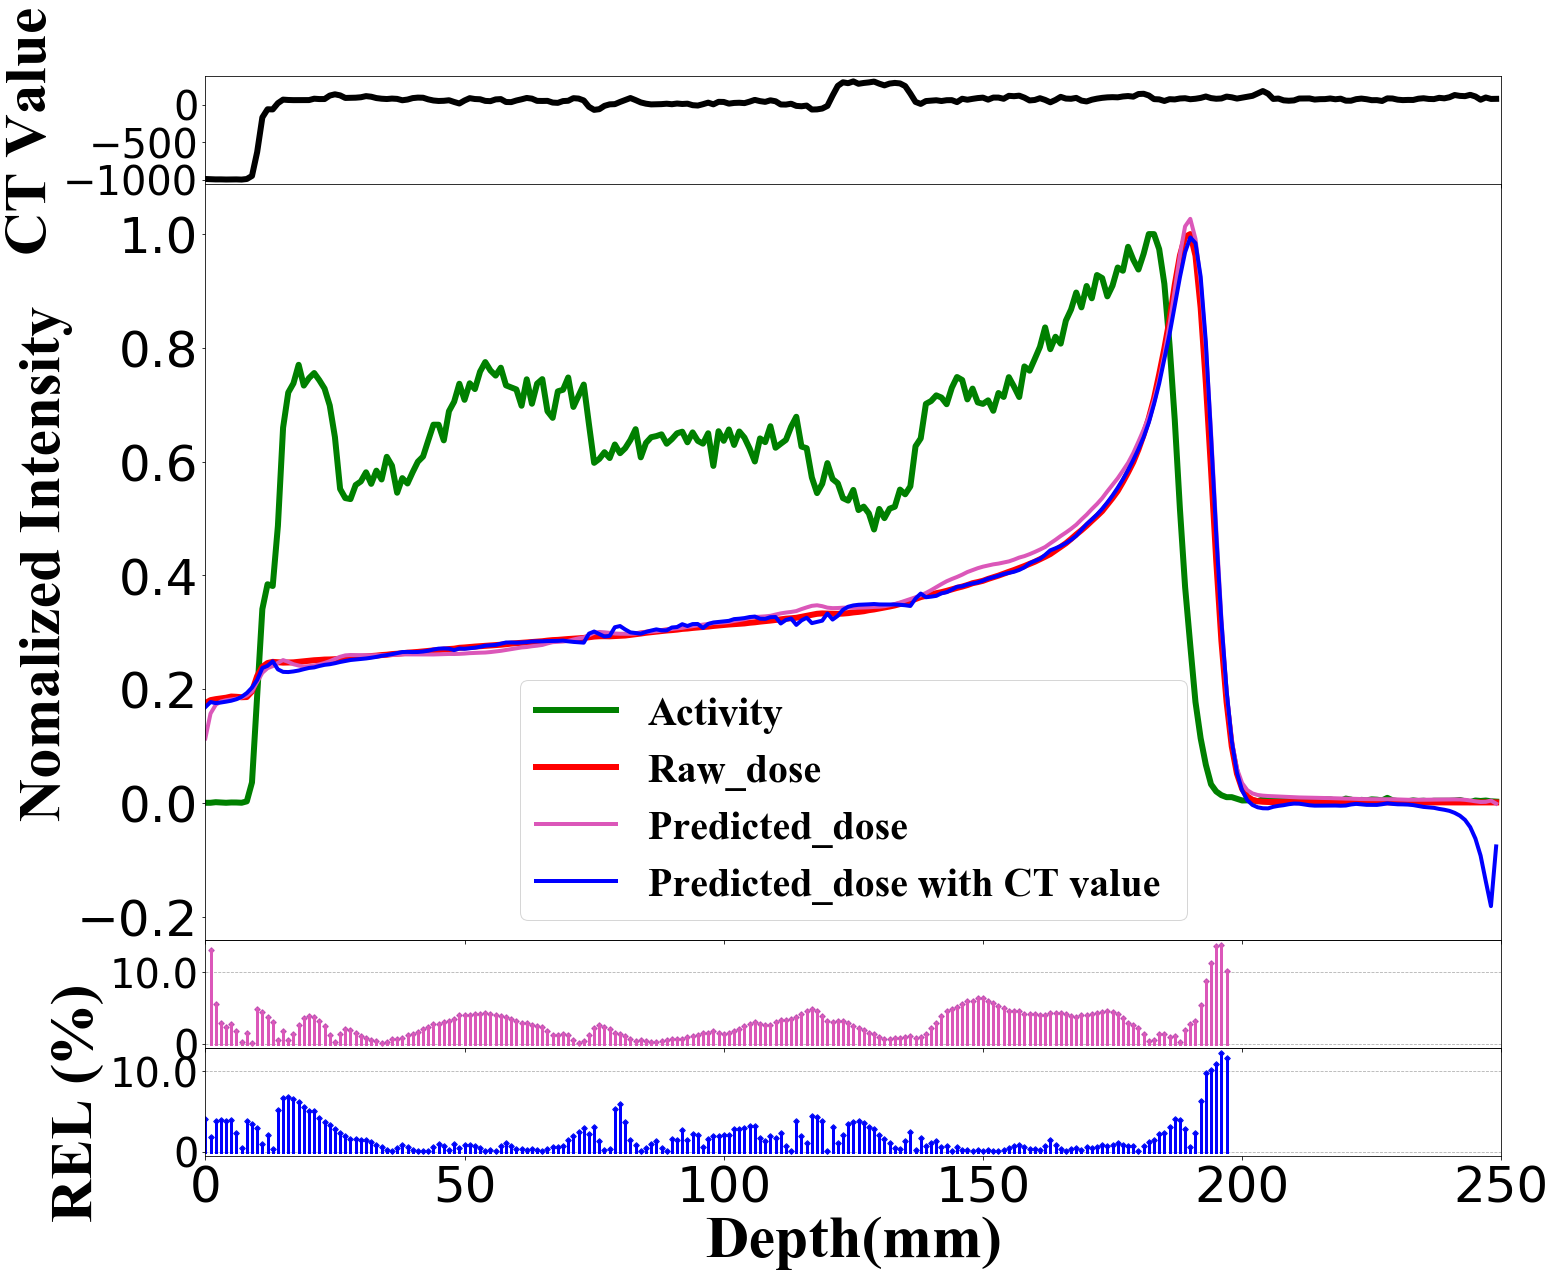

In [368]:
k = 54

rect_d = [0.1, 0.0, 0.6, 0.1]
rect_d2 = [0.1, 0.1, 0.6, 0.1]
rect_m = [0.1, 0.2, 0.6, 0.7]
rect_u = [0.1, 0.9, 0.6, 0.1]


# start with a rectangular Figure
plt.figure(1, figsize=(30, 15))

ax_u = plt.axes(rect_u)
X_test3 = X_train_0[k]
ax_u.plot(X_test3[:, 1], color='black', lw=6)
ax_u.set_xlim((0, 250))
plt.yticks(fontsize=40)
ax_u.set_ylabel('CT Value', font3)
plt.locator_params('y', nbins=4)
#ax_u.set_yticklabels([0.0,-1000,500])
plt.setp(ax_u.get_xticklabels(), visible=False)

####  底部图

ax_d = plt.axes(rect_d)
X_test3 = X_train_0[k]
Y_test3 = y_train_0[k]
X_test3 = np.array(X_test3)
X_test3 = np.reshape(X_test3, (1, X_test3.shape[0], 2))
predicted_test3 = model.predict(X_test3)
predicted_test3 = predicted_test3.ravel()
X_test3 = X_test3[:, 0].ravel()
per_list = []
for i in range(240):
    if Y_test3[i] > 0.1:
        a = abs(predicted_test3[i] - Y_test3[i]) / Y_test3[i]
        per_list.append(a)
per_array = np.array(per_list) * 100
x = range(len(per_list))
markerline, stemlines, baseline = ax_d.stem(x, per_array, '--')
plt.setp(
    markerline,
    marker='D',
    markersize=4,
    markeredgecolor="blue",
    markeredgewidth=1)
plt.setp(stemlines, linestyle="-", color="blue", linewidth=3)
plt.setp(baseline, visible=False)
plt.grid(True, axis='y', linestyle='--')
ax_d.set_xlim((0, 250))
#ax_d.set_ylim((0,10))
ax_d.set_ylabel("REL (%)", font3)
ax_d.set_xlabel('Depth(mm)', font3)
ax_d.set_yticklabels([0.0, 0, 10.0])
#ax_d.set_yticks([0,5,10])
plt.locator_params('y', nbins=2)
plt.xticks(fontsize="50")
plt.yticks(fontsize="40")



ax_d2 = plt.axes(rect_d2)
X_test32 = X_train_02[k]
Y_test32 = y_train_02[k]
X_test32 = np.array(X_test32)
X_test32 = np.reshape(X_test32, (1, X_test32.shape[0], 1))
predicted_test32 = model_2.predict(X_test32)
predicted_test32 = predicted_test32.ravel()
X_test32 = X_test32.ravel()
per_list2 = []
for i in range(240):
    if Y_test32[i] > 0.1:
        a = abs(predicted_test32[i] - Y_test32[i]) / Y_test32[i]
        per_list2.append(a)
per_array2 = np.array(per_list2) * 100
x2 = range(len(per_list2))
markerline, stemlines, baseline = ax_d2.stem(x2[1:], per_array2[1:], '--')
plt.setp(
    markerline,
    marker='D',
    markersize=4,
    markeredgecolor=c[13],
    markeredgewidth=1)
plt.setp(stemlines, linestyle="-", color=c[13], linewidth=3)
plt.setp(baseline, visible=False)
plt.grid(True, axis='y', linestyle='--')
#plt.hlines(10, 0, 200, colors = "c", linestyles = "dashed",lw = 3)   ### 画横线
ax_d2.set_xlim((0, 250))
ax_d2.set_yticklabels([0.0, 0, 10.0])
plt.locator_params('y', nbins=3)
plt.yticks(fontsize="40")
plt.setp(ax_d2.get_xticklabels(), visible=False)

##### 中间绘图

ax_m = plt.axes(rect_m)

X_test3 = X_train_0[k]
Y_test3 = y_train_0[k]
X_test3 = np.array(X_test3)
X_test3 = np.reshape(X_test3, (1, X_test3.shape[0], 2))
predicted_test3 = model.predict(X_test3)
predicted_test3 = predicted_test3.ravel()
X_test3 = X_test3[:, :, 0].ravel()

X_test32 = X_train_02[k]
Y_test32 = y_train_02[k]
X_test32 = np.array(X_test32)
X_test32 = np.reshape(X_test32, (1, X_test32.shape[0], 1))
predicted_test32 = model_2.predict(X_test32)
predicted_test32 = predicted_test32.ravel()
X_test32 = X_test32.ravel()

ax_m.plot(X_test3, color='green', lw=6, label='Activity')
ax_m.plot(Y_test3, color='red', lw=6, label='Raw_dose ')
ax_m.plot(predicted_test32, color=c[13], lw=4, label='Predicted_dose ')
ax_m.plot(predicted_test3, color='blue', lw=4, label='Predicted_dose with CT value ')


#plt.title('prediction')
ax_m.set_ylabel('Nomalized Intensity', font3)
ax_m.set_xlim((0, 250))
plt.yticks(fontsize=50)
#plt.text(210, 0.5, 'E = 140 MeV', fontdict= font)
plt.legend(prop=font)

plt.setp(ax_m.get_xticklabels(), visible=False)
plt.savefig("Compare.png", bbox_inches='tight', dpi=300)
plt.show()

 ## Test on new ct

### 不加 CT 值

In [5]:
activity  = np.load("Activity.npy")
activity = activity[:,:250]
dose  = np.load("Dose.npy")
dose = dose[:,:250]

In [400]:
def loss_cal_basic(X_test, y_test):

    # 计算 LOSS 峰值偏移等指标

    N = X_test.shape[0]

    test_loss_total = []
    peak_loss_total = []
    peak_shift_total = []
    peak_half_loss_list = []
    peak_twenty_percent_loss_list = []

    for i in range(N):

        X_test[i] = np.array(X_test[i], dtype=float)
        y_test[i] = np.array(y_test[i], dtype=float)
        X_test_0 = X_test[i][np.newaxis, :, :]
        y_test_0 = y_test[i][np.newaxis, :, :]

        # 计算 测试集总误差

        y_test_0_pred = model_2.predict(X_test_0)
        test_loss = np.mean(np.square(y_test_0_pred - y_test_0))
        test_loss_total.append(test_loss)

        x_pre = model_2.predict(X_test_0)
        x_pre = x_pre.ravel()  # 调整形状
        x_pre = np.array(x_pre, dtype=np.float64)  # 调整 数据
        x_real = y_test_0.ravel()

        # 计算测试集 peak 偏移
        peak_shift = abs(np.argmax(x_real) - np.argmax(x_pre))
        peak_shift_total.append(peak_shift)

        # 转换为列表
        x_real_list = x_real.tolist()
        x_pre_list = x_pre.tolist()

        # 计算 测试集 距离峰值一半的偏差
        half_peak = x_real.max() * 0.5
        for j in x_real[:np.argmax(x_real)]:
            if j > half_peak or j == half_peak:
                index_l1 = x_real_list.index(j)
                break
        for j in x_real[np.argmax(x_real):]:
            if j < half_peak or j == half_peak:
                index_r1 = x_real_list[np.argmax(x_real):].index(
                    j) + np.argmax(x_real)
                break

        half_loss = [
            abs(x_real_list[i] - x_pre_list[i])
            for i in range(index_l1,index_r1)
        ]
        peak_half_loss = np.mean(np.square(half_loss))
        peak_half_loss_list.append(peak_half_loss)

        # 计算距离峰值 20% 的偏差
        twenty_percent_peak = x_real.max() * 0.2
        for i in x_real[:np.argmax(x_real)]:
            if i > twenty_percent_peak or i == twenty_percent_peak:
                index_l2 = x_real_list.index(i)
                break

        for i in x_real[np.argmax(x_real):]:
            if i < twenty_percent_peak or i == twenty_percent_peak:
                index_r2 = x_real_list[np.argmax(x_real):].index(
                    i) + np.argmax(x_real)
                break
        twenty_percent_loss = [
            abs(x_real_list[i] - x_pre_list[i])
            for i in range(index_l2,index_r2)
        ]
        peak_twenty_percent_loss = np.mean(np.square(twenty_percent_loss))
        peak_twenty_percent_loss_list.append(peak_twenty_percent_loss)

        i = i + 1

    peak_shift_MAE = np.mean(peak_shift_total)
    peak_shift_MSE = np.mean(np.square(peak_shift_total))
    peak_twenty_percent_loss_ave = np.mean(peak_twenty_percent_loss_list)
    peak_half_loss_ave = np.mean(peak_half_loss_list)
    test_loss_total_ave = np.mean(test_loss_total)

    return peak_shift_MAE,peak_shift_MSE,test_loss_total_ave,peak_half_loss_ave,peak_twenty_percent_loss_ave

In [404]:
def curve_shift_basic(X_test, y_test):

    per_average_total = []
    per50_average_total = []
    per20_average_total = []
    N = X_test.shape[0]

    for i in range(N):

        X_test[i] = np.array(X_test[i], dtype=float)
        y_test[i] = np.array(y_test[i], dtype=float)
        X_test_0 = X_test[i][np.newaxis, :, :]
        y_test_0 = y_test[i][np.newaxis, :, :]
        #X_test[i] = X_test[i].reshape(X_test[i].shape(1),X_test[i].shape(0),1)
        #y_test[i] = y_test[i].reshape(y_test[i].shape(1),y_test[i].shape(0),1)

        

        x_pre = model_2.predict(X_test_0, batch_size=1, verbose=0)
        x_pre = x_pre.ravel()  # 调整形状
        x_pre = np.array(x_pre, dtype=np.float64)  # 调整 数据
        x_real = y_test_0.ravel()

        # 计算曲线的 总偏移
        #curve_shift = x_real - x_pre
        per_list = []
        n = 0
        for i in range(250):
            if x_real[i] >  1e-3:
                n= n+1
                a= abs(x_real[i] - x_pre[i] )/ x_real[i] 
                per_list.append(a)
        per_average = sum(per_list) / n
        per_average_total.append(per_average)

        # 计算曲线的半高偏移

        # 转换为列表
        x_real_list = x_real.tolist()
        x_pre_list = x_pre.tolist()

        # 计算 测试集 距离峰值一半的偏差
        half_peak = x_real.max() * 0.5
        for j in x_real[:np.argmax(x_real)]:
            if j > half_peak or j == half_peak:
                index_l1 = x_real_list.index(j)
                break
        for j in x_real[np.argmax(x_real):]:
            if j < half_peak or j == half_peak:
                index_r1 = x_real_list[np.argmax(x_real):].index(
                    j) + np.argmax(x_real)
                break

        per50_list = [
            abs(x_real_list[i] - x_pre_list[i]) / x_real_list[i]
            for i in range(index_l1,index_r1)
        ]

        per50_average = sum(per50_list) / (index_r1 - index_l1)
        per50_average_total.append(per50_average)

        # 计算距离峰值 20% 的偏差
        twenty_percent_peak = x_real.max() * 0.2
        for i in x_real[:np.argmax(x_real)]:
            if i > twenty_percent_peak or i == twenty_percent_peak:
                index_l2 = x_real_list.index(i)
                break

        for i in x_real[np.argmax(x_real):]:
            if i < twenty_percent_peak or i == twenty_percent_peak:
                index_r2 = x_real_list[np.argmax(x_real):].index(
                    i) + np.argmax(x_real)
                break
        per20_list = [
            abs(x_real_list[i] - x_pre_list[i]) / x_real_list[i]
            for i in range(index_l2,index_r2)
        ]

        per20_average = sum(per20_list) / (index_r2 - index_l2)
        per20_average_total.append(per20_average)

        i = i + 1

    per100 = sum(per_average_total) / N
    per50 = sum(per50_average_total) / N
    per20 = sum(per20_average_total) / N

    return per100, per50, per20

In [401]:
loss_cal_basic(activity[:,:,np.newaxis],dose[:,:,np.newaxis])

(0.6350230414746544,
 0.9410138248847926,
 0.0011327751,
 0.0067323806831713195,
 0.0025060199873301907)

In [405]:
curve_shift_basic(activity[:,:,np.newaxis],dose[:,:,np.newaxis])

(0.18606448371495568, 0.08197028149280271, 0.09050975722169309)

### 加入 CT 值

In [390]:
ct2 =  pd.read_excel("CT_test.xlsx",header= None)
ct2 = np.array(ct2)
ct2 = ct2.T

In [391]:
x0= np.arange(512)  # 原始数据
x_new = np.linspace(x0.min(), x0.max(), 302)  # 插值成 512 个点

In [392]:
from scipy import interpolate 
dose_list_slinear = []
for i in range(35):
    dose = ct2[i]
    f = interpolate.interp1d(x0, dose, kind="slinear")
    dose_new = f(x_new)
    dose_list_slinear.append(dose_new)

Dose_inter_slinear = np.array(dose_list_slinear)
print("Dose_inter_slinear 是不是 ndarray 类型 ？ ", isinstance(Dose_inter_slinear,
                                                 np.ndarray))
print("Dose_inter_slinear  Size : ", np.shape(Dose_inter_slinear))

Dose_inter_slinear 是不是 ndarray 类型 ？  True
Dose_inter_slinear  Size :  (35, 302)


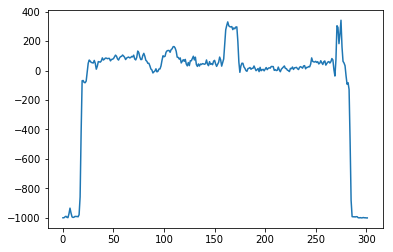

In [393]:
plt.plot(Dose_inter_slinear[1,:])

In [394]:
data_df = pd.DataFrame(Dose_inter_slinear)

writer = pd.ExcelWriter('CT2_norm.xlsx')
data_df.to_excel(writer, 'page_1', float_format='%.8f',header=None,index=None,columns=None)  # float_format 控制精度
writer.save()

In [395]:
ct2 = pd.read_excel("CT2_norm.xlsx",header= None)
ct2 = np.array(ct2)
ct2

array([[-1000.        , -1000.        ,  -998.60465116, ...,
         -993.18604651,  -993.02325581, -1000.        ],
       [ -999.        ,  -999.        ,  -993.02325581, ...,
         -999.        , -1000.        , -1000.        ],
       [ -973.        ,  -999.09302326,  -999.60465116, ...,
         -999.39534884,  -999.30232558, -1000.        ],
       ...,
       [-1000.        ,  -997.60465116,  -999.60465116, ...,
         -999.60465116,  -999.39534884, -1000.        ],
       [ -977.        ,  -981.09302326,  -986.79069767, ...,
        -1000.        , -1000.        , -1000.        ],
       [-1000.        ,  -987.41860465,  -984.23255814, ...,
         -997.39534884,  -999.30232558, -1000.        ]])

In [408]:
ct2= ct2[:,:250]
X_train_total2 = np.zeros((1085,250,2))
for i in range(1085):
    X_train_total2[i,:,0] = activity[i,:]
for i in range(1085):
    X_train_total2[i,:,1] = ct2[i%35,:]

In [437]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
ct_minmax = min_max_scaler.fit_transform(ct2.T)
ct3 = ct_minmax.T[:, :250]

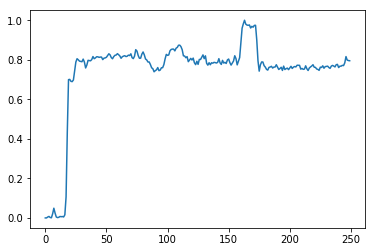

In [439]:
plt.plot(ct3[1,:])

In [440]:
X_train_total3 = np.zeros((1085,250,2))
for i in range(1085):
    X_train_total3[i,:,0] = activity[i,:]
for i in range(1085):
    X_train_total3[i,:,1] = ct3[i%35,:]

In [409]:
loss_cal(X_train_total2,dose[:,:,np.newaxis])

(1.5612903225806452,
 7.8101382488479265,
 0.0032222343,
 0.019317821455600678,
 0.006465272867172717)

In [412]:
curve_shift(X_train_total2,dose[:,:,np.newaxis])

(0.6970699684441685, 0.1428173787444181, 0.13717565008583224)

In [460]:
loss_cal(X_train_total2[0:100],dose[0:100,:,np.newaxis])

(1.7, 3.88, 0.0031699436, 0.036140025671646626, 0.00939274227152125)

In [461]:
curve_shift(X_train_total2[0:100],dose[0:100,:,np.newaxis])

(0.5756428843792519, 0.20003935927686786, 0.1588558861870247)

In [418]:
model_3 = load_model("ct_BiGRU.h5")

In [420]:
def curve_shift_ct(X_test, y_test):

    per_average_total = []
    per50_average_total = []
    per20_average_total = []
    N = X_test.shape[0]

    for i in range(N):

        X_test[i] = np.array(X_test[i], dtype=float)
        y_test[i] = np.array(y_test[i], dtype=float)
        X_test_0 = X_test[i][np.newaxis, :, :]
        y_test_0 = y_test[i][np.newaxis, :, :]
        #X_test[i] = X_test[i].reshape(X_test[i].shape(1),X_test[i].shape(0),1)
        #y_test[i] = y_test[i].reshape(y_test[i].shape(1),y_test[i].shape(0),1)

        

        x_pre = model_3.predict(X_test_0, batch_size=1, verbose=0)
        x_pre = x_pre.ravel()  # 调整形状
        x_pre = np.array(x_pre, dtype=np.float64)  # 调整 数据
        x_real = y_test_0.ravel()

        # 计算曲线的 总偏移
        #curve_shift = x_real - x_pre
        per_list = []
        n = 0
        for i in range(250):
            if x_real[i] >  1e-3:
                n= n+1
                a= abs(x_real[i] - x_pre[i] )/ x_real[i] 
                per_list.append(a)
        per_average = sum(per_list) / n
        per_average_total.append(per_average)

        # 计算曲线的半高偏移

        # 转换为列表
        x_real_list = x_real.tolist()
        x_pre_list = x_pre.tolist()

        # 计算 测试集 距离峰值一半的偏差
        half_peak = x_real.max() * 0.5
        for j in x_real[:np.argmax(x_real)]:
            if j > half_peak or j == half_peak:
                index_l1 = x_real_list.index(j)
                break
        for j in x_real[np.argmax(x_real):]:
            if j < half_peak or j == half_peak:
                index_r1 = x_real_list[np.argmax(x_real):].index(
                    j) + np.argmax(x_real)
                break

        per50_list = [
            abs(x_real_list[i] - x_pre_list[i]) / x_real_list[i]
            for i in range(index_l1,index_r1)
        ]

        per50_average = sum(per50_list) / (index_r1 - index_l1)
        per50_average_total.append(per50_average)

        # 计算距离峰值 20% 的偏差
        twenty_percent_peak = x_real.max() * 0.2
        for i in x_real[:np.argmax(x_real)]:
            if i > twenty_percent_peak or i == twenty_percent_peak:
                index_l2 = x_real_list.index(i)
                break

        for i in x_real[np.argmax(x_real):]:
            if i < twenty_percent_peak or i == twenty_percent_peak:
                index_r2 = x_real_list[np.argmax(x_real):].index(
                    i) + np.argmax(x_real)
                break
        per20_list = [
            abs(x_real_list[i] - x_pre_list[i]) / x_real_list[i]
            for i in range(index_l2,index_r2)
        ]

        per20_average = sum(per20_list) / (index_r2 - index_l2)
        per20_average_total.append(per20_average)

        i = i + 1

    per100 = sum(per_average_total) / N
    per50 = sum(per50_average_total) / N
    per20 = sum(per20_average_total) / N

    return per100, per50, per20

In [427]:
curve_shift_ct(X_train_total2,dose[:,:,np.newaxis])

KeyboardInterrupt: 

In [428]:
def loss_cal_ct(X_test, y_test):

    # 计算 LOSS 峰值偏移等指标

    N = X_test.shape[0]

    test_loss_total = []
    peak_loss_total = []
    peak_shift_total = []
    peak_half_loss_list = []
    peak_twenty_percent_loss_list = []

    for i in range(N):

        X_test[i] = np.array(X_test[i], dtype=float)
        y_test[i] = np.array(y_test[i], dtype=float)
        X_test_0 = X_test[i][np.newaxis, :, :]
        y_test_0 = y_test[i][np.newaxis, :, :]

        # 计算 测试集总误差

        y_test_0_pred = model_3.predict(X_test_0)
        test_loss = np.mean(np.square(y_test_0_pred - y_test_0))
        test_loss_total.append(test_loss)

        x_pre = model_3.predict(X_test_0)
        x_pre = x_pre.ravel()  # 调整形状
        x_pre = np.array(x_pre, dtype=np.float64)  # 调整 数据
        x_real = y_test_0.ravel()

        # 计算测试集 peak 偏移
        peak_shift = abs(np.argmax(x_real) - np.argmax(x_pre))
        peak_shift_total.append(peak_shift)

        # 转换为列表
        x_real_list = x_real.tolist()
        x_pre_list = x_pre.tolist()

        # 计算 测试集 距离峰值一半的偏差
        half_peak = x_real.max() * 0.5
        for j in x_real[:np.argmax(x_real)]:
            if j > half_peak or j == half_peak:
                index_l1 = x_real_list.index(j)
                break
        for j in x_real[np.argmax(x_real):]:
            if j < half_peak or j == half_peak:
                index_r1 = x_real_list[np.argmax(x_real):].index(
                    j) + np.argmax(x_real)
                break

        half_loss = [
            abs(x_real_list[i] - x_pre_list[i])
            for i in range(index_l1,index_r1)
        ]
        peak_half_loss = np.mean(np.square(half_loss))
        peak_half_loss_list.append(peak_half_loss)

        # 计算距离峰值 20% 的偏差
        twenty_percent_peak = x_real.max() * 0.2
        for i in x_real[:np.argmax(x_real)]:
            if i > twenty_percent_peak or i == twenty_percent_peak:
                index_l2 = x_real_list.index(i)
                break

        for i in x_real[np.argmax(x_real):]:
            if i < twenty_percent_peak or i == twenty_percent_peak:
                index_r2 = x_real_list[np.argmax(x_real):].index(
                    i) + np.argmax(x_real)
                break
        twenty_percent_loss = [
            abs(x_real_list[i] - x_pre_list[i])
            for i in range(index_l2,index_r2)
        ]
        peak_twenty_percent_loss = np.mean(np.square(twenty_percent_loss))
        peak_twenty_percent_loss_list.append(peak_twenty_percent_loss)

        i = i + 1

    peak_shift_MAE = np.mean(peak_shift_total)
    peak_shift_MSE = np.mean(np.square(peak_shift_total))
    peak_twenty_percent_loss_ave = np.mean(peak_twenty_percent_loss_list)
    peak_half_loss_ave = np.mean(peak_half_loss_list)
    test_loss_total_ave = np.mean(test_loss_total)

    return peak_shift_MAE,peak_shift_MSE,test_loss_total_ave,peak_half_loss_ave,peak_twenty_percent_loss_ave

In [455]:
loss_cal_ct(X_train_total2[500:1000],dose[500:1000,:,np.newaxis])

(77.336, 7701.28, 0.08361445, 0.5275454257233814, 0.1725515831918948)

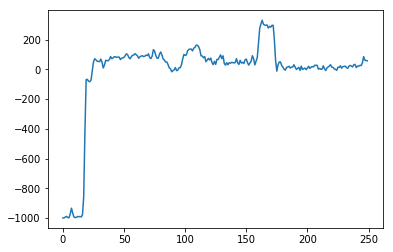

In [431]:
plt.plot(X_train_total2[1,:,1])

In [432]:
model_4 = load_model("Nom_BiLSTM.h5")

In [435]:
def loss_cal_ct(X_test, y_test):

    # 计算 LOSS 峰值偏移等指标

    N = X_test.shape[0]

    test_loss_total = []
    peak_loss_total = []
    peak_shift_total = []
    peak_half_loss_list = []
    peak_twenty_percent_loss_list = []

    for i in range(N):

        X_test[i] = np.array(X_test[i], dtype=float)
        y_test[i] = np.array(y_test[i], dtype=float)
        X_test_0 = X_test[i][np.newaxis, :, :]
        y_test_0 = y_test[i][np.newaxis, :, :]

        # 计算 测试集总误差

        y_test_0_pred = model_4.predict(X_test_0)
        test_loss = np.mean(np.square(y_test_0_pred - y_test_0))
        test_loss_total.append(test_loss)

        x_pre = model_4.predict(X_test_0)
        x_pre = x_pre.ravel()  # 调整形状
        x_pre = np.array(x_pre, dtype=np.float64)  # 调整 数据
        x_real = y_test_0.ravel()

        # 计算测试集 peak 偏移
        peak_shift = abs(np.argmax(x_real) - np.argmax(x_pre))
        peak_shift_total.append(peak_shift)

        # 转换为列表
        x_real_list = x_real.tolist()
        x_pre_list = x_pre.tolist()

        # 计算 测试集 距离峰值一半的偏差
        half_peak = x_real.max() * 0.5
        for j in x_real[:np.argmax(x_real)]:
            if j > half_peak or j == half_peak:
                index_l1 = x_real_list.index(j)
                break
        for j in x_real[np.argmax(x_real):]:
            if j < half_peak or j == half_peak:
                index_r1 = x_real_list[np.argmax(x_real):].index(
                    j) + np.argmax(x_real)
                break

        half_loss = [
            abs(x_real_list[i] - x_pre_list[i])
            for i in range(index_l1,index_r1)
        ]
        peak_half_loss = np.mean(np.square(half_loss))
        peak_half_loss_list.append(peak_half_loss)

        # 计算距离峰值 20% 的偏差
        twenty_percent_peak = x_real.max() * 0.2
        for i in x_real[:np.argmax(x_real)]:
            if i > twenty_percent_peak or i == twenty_percent_peak:
                index_l2 = x_real_list.index(i)
                break

        for i in x_real[np.argmax(x_real):]:
            if i < twenty_percent_peak or i == twenty_percent_peak:
                index_r2 = x_real_list[np.argmax(x_real):].index(
                    i) + np.argmax(x_real)
                break
        twenty_percent_loss = [
            abs(x_real_list[i] - x_pre_list[i])
            for i in range(index_l2,index_r2)
        ]
        peak_twenty_percent_loss = np.mean(np.square(twenty_percent_loss))
        peak_twenty_percent_loss_list.append(peak_twenty_percent_loss)

        i = i + 1

    peak_shift_MAE = np.mean(peak_shift_total)
    peak_shift_MSE = np.mean(np.square(peak_shift_total))
    peak_twenty_percent_loss_ave = np.mean(peak_twenty_percent_loss_list)
    peak_half_loss_ave = np.mean(peak_half_loss_list)
    test_loss_total_ave = np.mean(test_loss_total)

    return peak_shift_MAE,peak_shift_MSE,test_loss_total_ave,peak_half_loss_ave,peak_twenty_percent_loss_ave

In [457]:
loss_cal_ct(X_train_total3[900:1000],dose[900:1000,:,np.newaxis])

(1.5, 5.12, 0.002567946, 0.013561545309203735, 0.004601021336215292)

In [442]:
def curve_shift_ct(X_test, y_test):

    per_average_total = []
    per50_average_total = []
    per20_average_total = []
    N = X_test.shape[0]

    for i in range(N):

        X_test[i] = np.array(X_test[i], dtype=float)
        y_test[i] = np.array(y_test[i], dtype=float)
        X_test_0 = X_test[i][np.newaxis, :, :]
        y_test_0 = y_test[i][np.newaxis, :, :]
        #X_test[i] = X_test[i].reshape(X_test[i].shape(1),X_test[i].shape(0),1)
        #y_test[i] = y_test[i].reshape(y_test[i].shape(1),y_test[i].shape(0),1)

        

        x_pre = model_4.predict(X_test_0, batch_size=1, verbose=0)
        x_pre = x_pre.ravel()  # 调整形状
        x_pre = np.array(x_pre, dtype=np.float64)  # 调整 数据
        x_real = y_test_0.ravel()

        # 计算曲线的 总偏移
        #curve_shift = x_real - x_pre
        per_list = []
        n = 0
        for i in range(250):
            if x_real[i] >  1e-3:
                n= n+1
                a= abs(x_real[i] - x_pre[i] )/ x_real[i] 
                per_list.append(a)
        per_average = sum(per_list) / n
        per_average_total.append(per_average)

        # 计算曲线的半高偏移

        # 转换为列表
        x_real_list = x_real.tolist()
        x_pre_list = x_pre.tolist()

        # 计算 测试集 距离峰值一半的偏差
        half_peak = x_real.max() * 0.5
        for j in x_real[:np.argmax(x_real)]:
            if j > half_peak or j == half_peak:
                index_l1 = x_real_list.index(j)
                break
        for j in x_real[np.argmax(x_real):]:
            if j < half_peak or j == half_peak:
                index_r1 = x_real_list[np.argmax(x_real):].index(
                    j) + np.argmax(x_real)
                break

        per50_list = [
            abs(x_real_list[i] - x_pre_list[i]) / x_real_list[i]
            for i in range(index_l1,index_r1)
        ]

        per50_average = sum(per50_list) / (index_r1 - index_l1)
        per50_average_total.append(per50_average)

        # 计算距离峰值 20% 的偏差
        twenty_percent_peak = x_real.max() * 0.2
        for i in x_real[:np.argmax(x_real)]:
            if i > twenty_percent_peak or i == twenty_percent_peak:
                index_l2 = x_real_list.index(i)
                break

        for i in x_real[np.argmax(x_real):]:
            if i < twenty_percent_peak or i == twenty_percent_peak:
                index_r2 = x_real_list[np.argmax(x_real):].index(
                    i) + np.argmax(x_real)
                break
        per20_list = [
            abs(x_real_list[i] - x_pre_list[i]) / x_real_list[i]
            for i in range(index_l2,index_r2)
        ]

        per20_average = sum(per20_list) / (index_r2 - index_l2)
        per20_average_total.append(per20_average)

        i = i + 1

    per100 = sum(per_average_total) / N
    per50 = sum(per50_average_total) / N
    per20 = sum(per20_average_total) / N

    return per100, per50, per20

In [458]:
curve_shift_ct(X_train_total3[900:1000],dose[900:1000,:,np.newaxis])

(0.4227086350121785, 0.12923985247135547, 0.1092331671975896)

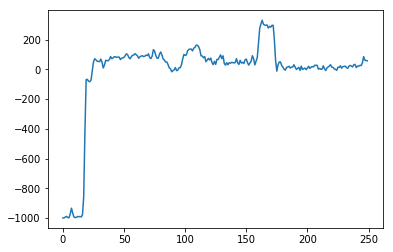

In [466]:
plt.plot(X_train_total2[1,:,1])

In [486]:
font={'family':'serif',
     'style':'normal',
    'weight':'bold',
      'size':50
}

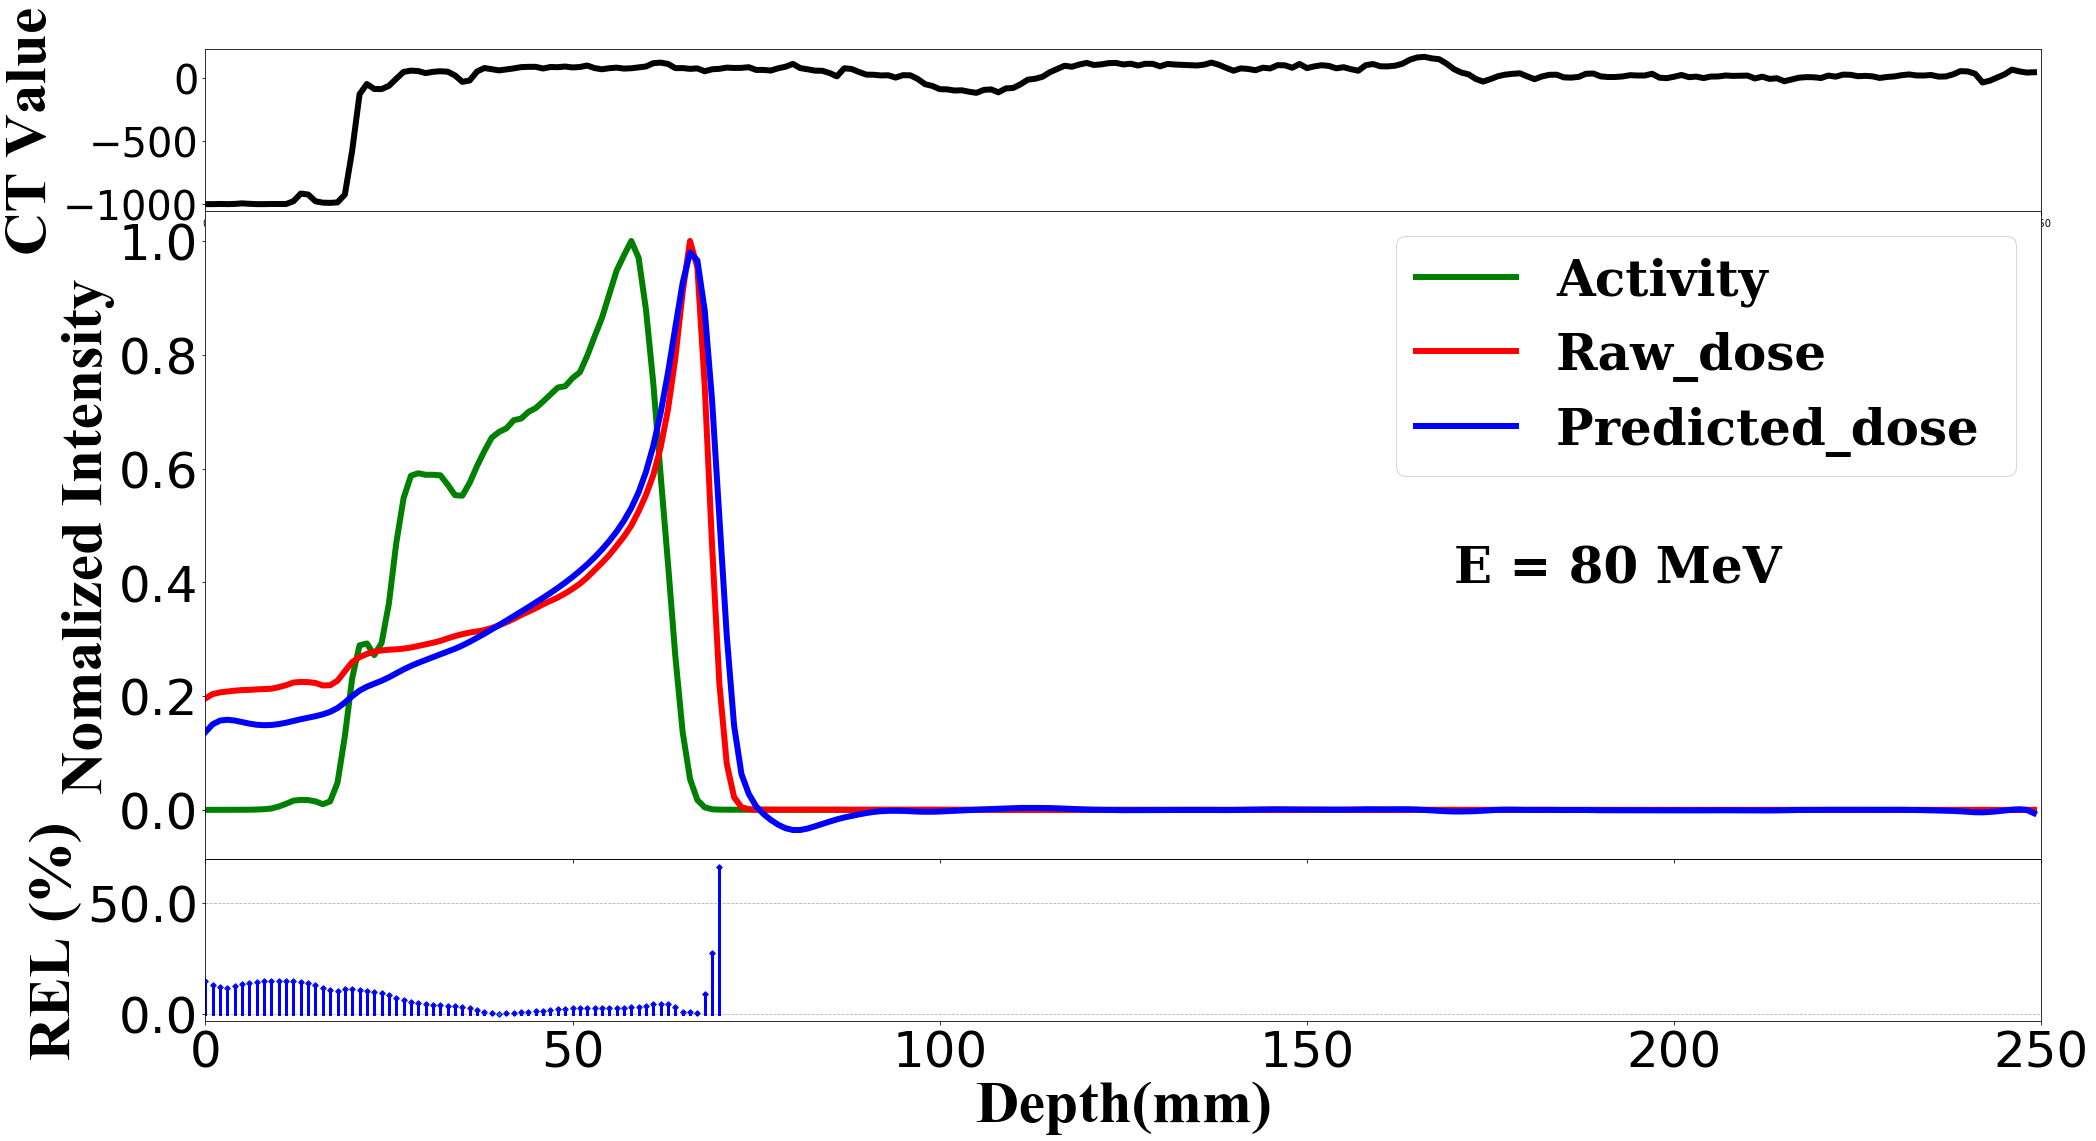

In [496]:
k = 0

rect_d = [0.1, 0.1, 0.85, 0.15]
rect_m = [0.1, 0.25, 0.85, 0.6]
rect_u = [0.1, 0.85, 0.85, 0.15]

# start with a rectangular Figure
plt.figure(1, figsize=(30, 15))

ax_u = plt.axes(rect_u)
X_test3 = X_train_total2[k]
ax_u.plot(X_test3[:, 1], color='black', lw=6)
ax_u.set_xlim((0, 250))
plt.yticks(fontsize=40)
ax_u.set_ylabel('CT Value', font3)
plt.locator_params('y', nbins=4)
#ax_u.set_yticklabels([0.0,-1000,500])
plt.setp(ax_m.get_xticklabels(), visible=False)

####  底部图

ax_d = plt.axes(rect_d)
X_test3 = X_train_total3[k]
Y_test3 = dose[k]
X_test3 = np.array(X_test3)
X_test3 = np.reshape(X_test3, (1, X_test3.shape[0], 2))
predicted_test3 = model_4.predict(X_test3)
predicted_test3 = predicted_test3.ravel()
X_test3 = X_test3[:, 0].ravel()
per_list = []
for i in range(240):
    if Y_test3[i] > 0.1:
        a = abs(predicted_test3[i] - Y_test3[i]) / Y_test3[i]
        per_list.append(a)
per_array = np.array(per_list) * 100
x = range(len(per_list))
markerline, stemlines, baseline = ax_d.stem(x, per_array, '--')
plt.setp(
    markerline,
    marker='D',
    markersize=4,
    markeredgecolor="blue",
    markeredgewidth=1)
plt.setp(stemlines, linestyle="-", color="blue", linewidth=3)
plt.setp(baseline, visible=False)
plt.grid(True, axis='y', linestyle='--')
ax_d.set_xlim((0, 250))
#ax_d.set_ylim((0,10))
ax_d.set_ylabel("REL (%)", font3)
ax_d.set_xlabel('Depth(mm)', font3)
ax_d.set_yticklabels([0.0, 0.0, 50.0])
#ax_d.set_yticks([0,5,10])
plt.locator_params('y', nbins=2)
plt.xticks(fontsize="50")
plt.yticks(fontsize="50")

##### 中间绘图

ax_m = plt.axes(rect_m)

X_test3 = X_train_total3[k]
Y_test3 = dose[k]
X_test3 = np.array(X_test3)
X_test3 = np.reshape(X_test3, (1, X_test3.shape[0], 2))
predicted_test3 = model_4.predict(X_test3)
predicted_test3 = predicted_test3.ravel()
X_test3 = X_test3[:, :, 0].ravel()
ax_m.plot(X_test3, color='green', lw=6, label='Activity')
ax_m.plot(Y_test3, color='red', lw=6, label='Raw_dose ')
ax_m.plot(predicted_test3, color='blue', lw=6, label='Predicted_dose ')
#plt.title('prediction')
ax_m.set_ylabel('Nomalized Intensity', font3)
ax_m.set_xlim((0, 250))
plt.yticks(fontsize=50)
plt.text(170, 0.4, 'E = 80 MeV', fontdict= font)
plt.legend(prop=font)

plt.setp(ax_m.get_xticklabels(), visible=False)
plt.savefig("CT2_80.png", bbox_inches='tight', dpi=300)
plt.show()

## 绘制 Hidden State

In [445]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
BiGRU_1 (Bidirectional)      (None, 250, 64)           6720      
_________________________________________________________________
BiGRU_2 (Bidirectional)      (None, 250, 64)           18624     
_________________________________________________________________
BiGRU_3 (Bidirectional)      (None, 250, 64)           18624     
_________________________________________________________________
TDense (TimeDistributed)     (None, 250, 1)            65        
Total params: 44,033
Trainable params: 44,033
Non-trainable params: 0
_________________________________________________________________


In [446]:
model.layers[0].trainable_weights

[<tf.Variable 'BiGRU_1/forward_GRU_1/kernel:0' shape=(2, 96) dtype=float32_ref>,
 <tf.Variable 'BiGRU_1/forward_GRU_1/recurrent_kernel:0' shape=(32, 96) dtype=float32_ref>,
 <tf.Variable 'BiGRU_1/forward_GRU_1/bias:0' shape=(96,) dtype=float32_ref>,
 <tf.Variable 'BiGRU_1/backward_GRU_1/kernel:0' shape=(2, 96) dtype=float32_ref>,
 <tf.Variable 'BiGRU_1/backward_GRU_1/recurrent_kernel:0' shape=(32, 96) dtype=float32_ref>,
 <tf.Variable 'BiGRU_1/backward_GRU_1/bias:0' shape=(96,) dtype=float32_ref>]

## 计算预测时间

In [11]:
X_test3 = X_test[1,:,:]
X_test3 = X_test3[np.newaxis,:,:]

In [12]:
import time
inter_list = []
for i in range(1000):
    start = time.time()
    predicted_test3 = model.predict(X_test3)
    end = time.time()
    interval = end - start 
    inter_list.append(interval)

In [13]:
print(np.mean(inter_list),np.std(inter_list))

0.05334321713447571 0.015087605859342972
